In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv(
    r'C:\Users\khali\OneDrive\Bureau\S6\ATSA&NN\ice_cream.csv', 
    index_col=0,  # Rend la premi√®re colonne comme index
    parse_dates=[0]  # Interpr√®te la premi√®re colonne comme des dates
)

In [5]:
data.sample(10)

IPN31152N
DATE                 
2017-06-01   123.0870
1980-06-01   108.4666
2016-03-01   116.1793
1983-03-01    86.6512
1986-10-01    86.4120
1988-11-01    87.7763
2000-12-01    88.5149
1993-04-01   140.7597
1992-06-01   158.2887
2008-07-01   145.0205

# 1. Observation Traitement,(Visualisation statstiques descriptiveses)

In [8]:
data.rename(columns={'IPN31152N': 'SALES'}, inplace=True)

In [10]:
data.head()

SALES
DATE               
1972-01-01  59.9622
1972-02-01  67.0605
1972-03-01  74.2350
1972-04-01  78.1120
1972-05-01  84.7636

### V√©rification et Conversion des Dates dans un Dataset avec Pandas

Lors de l'importation de donn√©es contenant des dates, Pandas peut automatiquement les interpr√©ter comme des objets `datetime`.  

#### Cas 1 : Les dates sont d√©j√† bien format√©es  
Si les dates sont correctement reconnues lors du chargement des donn√©es, aucune action suppl√©mentaire n'est n√©cessaire.

#### Cas 2 : Les dates ne sont pas bien format√©es  
Dans ce cas, nous devons les parser manuellement en sp√©cifiant un **parseur de date** personnalis√©. Voici comment proc√©der :

```python
from datetime import datetime
import pandas as pd

# D√©finition de la fonction de parsing des dates
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")  # Conversion de la cha√Æne en datetime
# s peut etre comme √ßa (2024-02-10,5.2) donc comme resultat on aura :"2024-02-10"
# Chargement du fichier CSV avec conversion explicite des dates
data = pd.read_csv(
    "fichier.csv",  
    parse_dates=[0],  
    index_col=[0],   
    date_parser=parser  # Utilisation de la fonction de parsing personnalis√©e
)
#Lorsque tu utilises date_parser=parser dans pd.read_csv(), Pandas applique la fonction parser() √† chaque valeur de la colonne sp√©cifi√©e dans parse_dates=[0].


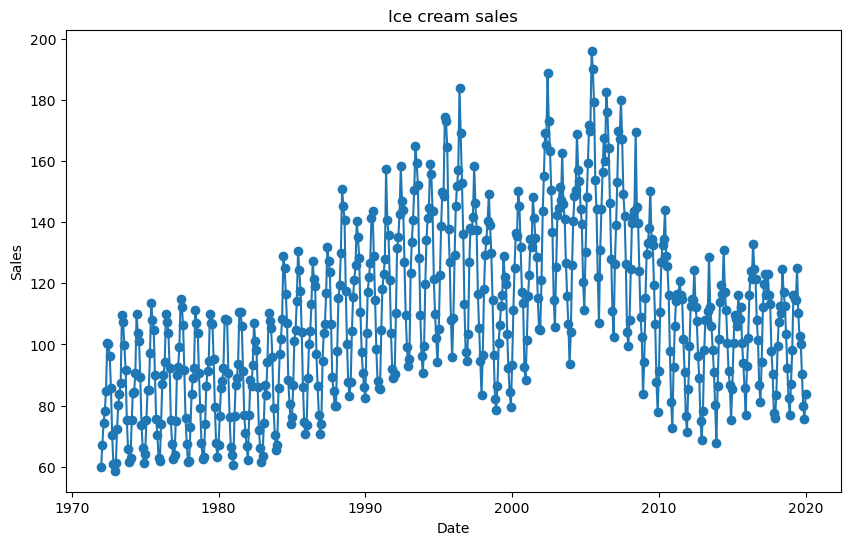

In [13]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data.SALES,marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ice cream sales')
plt.show()

### Inf√©rer la Fr√©quence des Donn√©es dans une S√©rie Temporelle

Lorsqu'une s√©rie temporelle n'a pas une fr√©quence clairement d√©finie, il est recommand√© d'utiliser `pandas.infer_freq()` pour d√©terminer automatiquement l'intervalle entre les observations.

#### Probl√®me :
Si la s√©rie temporelle ne poss√®de pas d'information explicite sur sa fr√©quence, certaines op√©rations comme la r√©√©chantillonnage (`resampling`), l'interpolation ou les pr√©visions peuvent √™tre impact√©es.

#### Solution :
Nous pouvons inf√©rer la fr√©quence (d√©terminer automatiquement l'intervalle de temps entre les observations d'une s√©rie temporelle) des donn√©es et l'appliquer √† la s√©rie √† l'aide de `asfreq()` :

In [15]:
data = data.asfreq(pd.infer_freq(data.index))
print(data.index.freq)

<MonthBegin>


In [16]:
start_data=pd.to_datetime('2010-01-01')
data1=data[start_data:]
data1.tail()

SALES
DATE                
2019-09-01  100.1741
2019-10-01   90.1684
2019-11-01   79.7223
2019-12-01   75.7094
2020-01-01   83.6290

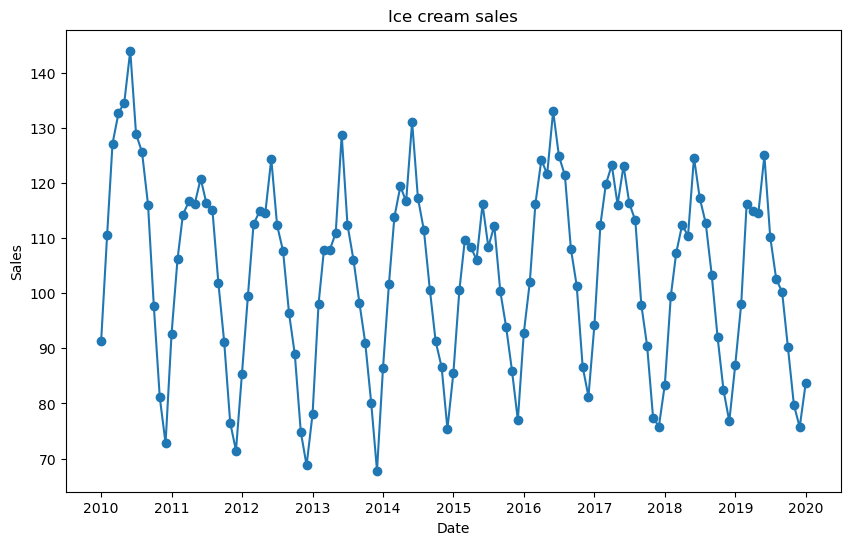

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data1,marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ice cream sales')
plt.show()

##  ‚Ä¢ Statistiques descriptives :

In [22]:
# data.describe()
from statsmodels.stats.descriptivestats import describe
describe(data1)

SALES
nobs              121.000000
missing             0.000000
mean              103.607036
std_err             1.537698
upper_ci          106.620869
lower_ci          100.593203
std                16.914680
iqr                25.138300
iqr_normal         18.635050
mad                14.253771
mad_normal         17.864453
coef_var            0.163258
range              76.148800
max               143.951900
min                67.803100
skew               -0.204000
kurtosis            2.232913
jarque_bera         3.805889
jarque_bera_pval    0.149129
mode               67.803100
mode_freq           0.008264
median            107.315200
1%                 69.307180
5%                 75.709400
10%                78.117500
25%                90.998200
50%               107.315200
75%               116.136500
90%               124.342800
95%               128.690900
99%               134.243380

## üìä R√©sum√© Statistique des Donn√©es

La fonction `describe(data)` de `statsmodels.stats.descriptivestats` fournit un r√©sum√© statistique des donn√©es, comprenant plusieurs indicateurs cl√©s.

### ‚ö†  Principales m√©triques :

- **nobs** : Nombre d'√©chantillons (n observations).
- **mean** : Moyenne des valeurs.
- **std** : √âcart-type, mesure de dispersion.
- **min** : Valeur minimale de l‚Äô√©chantillon.
- **max** : Valeur maximale de l‚Äô√©chantillon.
- **range** : √âtendue des valeurs (max - min).
- **skew** : Asym√©trie de la distribution.
- **kurtosis** : Coefficient d‚Äôaplatissement de la distribution.
 ____________________________________________________________________

# ‚Ä¢ Analyse de la distribution :

## üìä Calcul du Nombre de Bins

Le choix du nombre de bins pour un histogramme peut se faire √† l'aide de plusieurs m√©thodes statistiques :

### üîπ 1. M√©thode de Sturges  
La m√©thode de Sturges est bas√©e sur le logarithme du nombre d'√©chantillons :  

$$
k = 1 + \log_2(n)
$$

Avec **\( n = 121 \)** :  

$$
k = 1 + \log_2(121) = 7.918
$$

---

### üîπ 2. M√©thode de Freedman-Diaconis  
Cette m√©thode utilise l'√©tendue et l'intervalle interquartile (IQR) pour d√©terminer la largeur des bins :  

$$
k = \frac{\text{√©tendue}}{\text{largeur des bins}}
$$

Avec :

$$
\text{largeur des bins} = \frac{2 \times IQR}{n^{1/3}}
$$

Donn√©es :
- **\( \text{min} = 67.803100 \)**
- **\( \text{max} = 143.951900 \)**
- **\( IQR = 25.1383 \)** , "IQR represente l'√©tendue des valeurs situ√©es entre Q1=25% et Q3=75%"

Alors :

$$
k = \frac{(143.951900 - 67.803100)}{2 \times \frac{25.1383}{(121)^{1/3}}} = 7.49133
$$

---

### üîπ 3. M√©thode de Scott  
La m√©thode de Scott est bas√©e sur l'√©cart-type des donn√©es :

$$
k = \frac{\text{√©tendue}}{3.5 \times \frac{\sigma}{n^{1/3}}}
$$

Avec :
- **\( \sigma = 16.914680 \)**
- **\( \text{√©tendue} = 76.148800 \)**

On obtient :

$$
k = \frac{76.148800}{3.5 \times \frac{16.914680}{(121)^{1/3}}} = 6.362
$$

---

### üìå Conclusion :
- **Sturges** : \( k \approx 7.92 \)
- **Freedman-Diaconis** : \( k \approx 7.49 \)
- **Scott** : \( k \approx 6.36 \)

Ces m√©thodes permettent d'adapter le nombre de bins en fonction de la distribution des donn√©es.


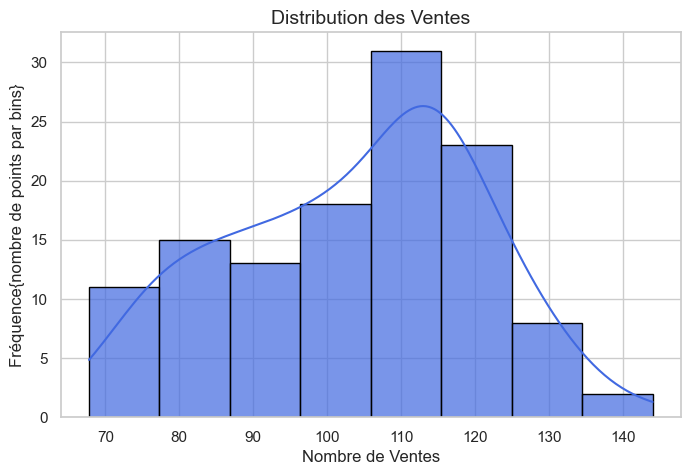

In [27]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data1['SALES'], kde=True, bins=8, color="royalblue", alpha=0.7, edgecolor="black")
plt.title("Distribution des Ventes", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fr√©quence{nombre de points par bins}", fontsize=12)
plt.show()

## üìä Calcul de Densit√© dans un Histogramme

La hauteur de chaque bin, appel√©e **densit√©** ou **fr√©quence**, est donn√©e par la formule :

$$ D = \frac{\text{nombre de points dans le bin}}{n \times w} $$

o√π :
- $D$ est la densit√© du bin
- $n$ est le nombre total d'√©chantillons ($\text{len(echantillons)}$)
- $w$ est la largeur du bin

### üîπ Exemple de calcul :

Nous allons calculer la densit√© du bin contenant le plus grand nombre de points dans notre distribution.

**Donn√©es :**
- Nombre total d'√©chantillons: $n = 121$
- Largeur du bin: $w = \frac{76.1488}{8}$
- Le bin s'√©tend de $(67.803100 + 4 \times \frac{76.1488}{8})$ √† $(67.803100 + 5 \times \frac{76.1488}{8})$

**Calcul du nombre de points dans ce bin :**

```python
k = 0
for i in data['SALES']:
    if (67.803100 + 4*(76.1488/8)) < i and i < (67.803100 + 5*(76.1488/8)):
        k += 1
print(k)  # k = 31 (exactement celle indiqu√©e sur la figure au dessus)
```
üîç Interpr√©tation :
La densit√© de 0.0269 signifie que, pour ce bin particulier, nous avons environ 2.69% des observations par unit√© de largeur du bin. Cela correspond au bin qui contient la concentration la plus √©lev√©e de nos donn√©es.

### üìä V√©rification de la Normalit√© avec la R√®gle Empirique (68-95-99.7)

La **r√®gle empirique** (ou **r√®gle des 68-95-99.7**) permet de v√©rifier si une distribution suit une **loi normale** en analysant la r√©partition des donn√©es autour de la moyenne.

#### üîπ Conditions √† v√©rifier :
- **68%** des donn√©es doivent appartenir √† l‚Äôintervalle :  
  $$
  [ \mu - \sigma, \mu + \sigma ]
  $$
- **95%** des donn√©es doivent appartenir √† l‚Äôintervalle :  
  $$
  [ \mu - 2\sigma, \mu + 2\sigma ]
  $$
- **99.7%** des donn√©es doivent appartenir √† l‚Äôintervalle :  
  $$
  [ \mu - 3\sigma, \mu + 3\sigma ]
  $$

#### üîπ √âtapes de v√©rification :
1. Calculer la **moyenne** \( \mu \) et l'**√©cart-type** \( \sigma \).
2. D√©terminer les intervalles d√©finis par la r√®gle empirique.
3. Calculer le **pourcentage des donn√©es** contenues dans chaque intervalle.
4. Comparer ces pourcentages aux valeurs th√©oriques attendues.

#### üìå Interpr√©tation :
- **Si les pourcentages observ√©s sont proches de 68%, 95% et 99.7%**, la distribution **peut √™tre consid√©r√©e comme normale**.
- **Sinon, il peut s'agir d'une distribution asym√©trique ou ayant des queues √©paisses (kurtosis √©lev√©e).**




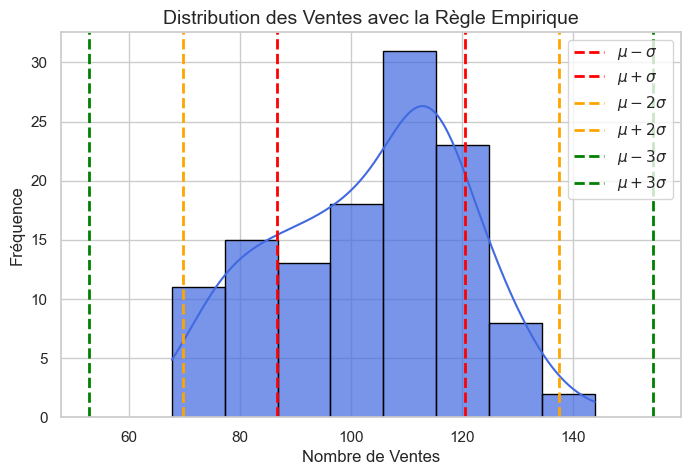

Proportion des donn√©es dans [Œº - œÉ, Œº + œÉ] : 0.6281 (Attendu : ~0.68)
‚ö†Ô∏è La distribution ne semble pas parfaitement normale.


In [30]:
mean = data1['SALES'].mean()
std = data1['SALES'].std()


sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.histplot(data1['SALES'], kde=True, bins=8, color="royalblue", alpha=0.7, edgecolor="black")

plt.axvline(mean - std, color='red', linestyle='dashed', linewidth=2, label=r'$\mu - \sigma$')
plt.axvline(mean + std, color='red', linestyle='dashed', linewidth=2, label=r'$\mu + \sigma$')

plt.axvline(mean - 2*std, color='orange', linestyle='dashed', linewidth=2, label=r'$\mu - 2\sigma$')
plt.axvline(mean + 2*std, color='orange', linestyle='dashed', linewidth=2, label=r'$\mu + 2\sigma$')

plt.axvline(mean - 3*std, color='green', linestyle='dashed', linewidth=2, label=r'$\mu - 3\sigma$')
plt.axvline(mean + 3*std, color='green', linestyle='dashed', linewidth=2, label=r'$\mu + 3\sigma$')

plt.title("Distribution des Ventes avec la R√®gle Empirique", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fr√©quence", fontsize=12)
plt.legend()
plt.show()

n = len(data1['SALES'])
inside_1std = ((data1['SALES'] >= (mean - std)) & (data1['SALES'] <= (mean + std))).sum() / n

print(f"Proportion des donn√©es dans [Œº - œÉ, Œº + œÉ] : {inside_1std:.4f} (Attendu : ~0.68)")

if np.isclose(inside_1std, 0.68, atol=0.05):
    print("‚úÖ La distribution suit approximativement une loi normale selon la r√®gle empirique.")
else:
    print("‚ö†Ô∏è La distribution ne semble pas parfaitement normale.")


# un petit cadeau pour bien comprendre ces discriptions

C:\Users\khali\AppData\Local\Temp\ipykernel_22888\4275365707.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


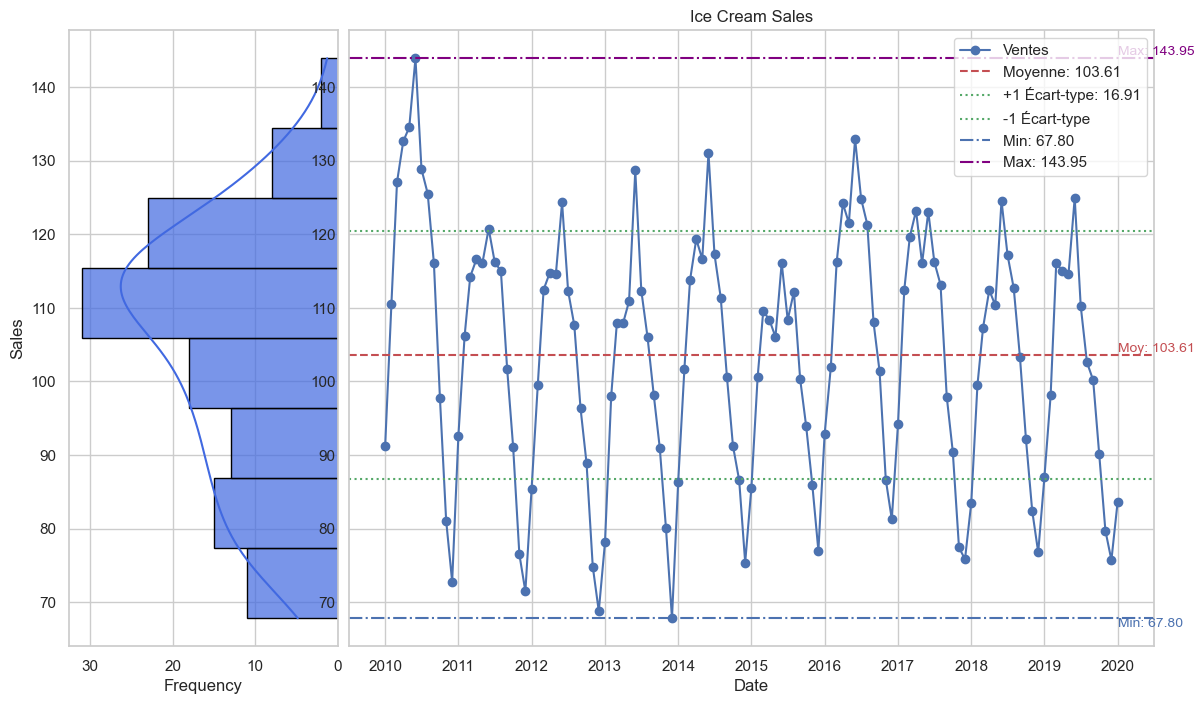

In [32]:

from matplotlib.gridspec import GridSpec

# Calcul des statistiques
mean_value = data1['SALES'].mean()
std_value = data1['SALES'].std()
min_value = data1['SALES'].min()
max_value = data1['SALES'].max()

# Cr√©ation de la figure
fig = plt.figure(figsize=(14, 8))

# Cr√©ation de GridSpec avec 2 colonnes
gs = GridSpec(1, 2, width_ratios=[1, 3], wspace=0.02)

# Cr√©ation du sous-plot pour l'histogramme vertical (√† gauche)
ax_hist = fig.add_subplot(gs[0])
sns.histplot(y=data1['SALES'], kde=True, bins=8, color="royalblue", 
             alpha=0.7, edgecolor="black", ax=ax_hist, orientation='horizontal')
ax_hist.set_ylabel('Sales')
ax_hist.set_xlabel('Frequency')
ax_hist.invert_xaxis()  # Inverse l'axe x pour que l'histogramme pointe vers la gauche

# Cr√©ation du sous-plot principal pour le graphique lin√©aire (√† droite)
ax_main = fig.add_subplot(gs[1], sharey=ax_hist)  # Partage l'axe y avec l'histogramme
ax_main.plot(data1.index, data1['SALES'], marker='o', linestyle='-', label='Ventes')

# Ajout des lignes indicatrices sur le graphique principal
ax_main.axhline(mean_value, color='r', linestyle='--', label=f'Moyenne: {mean_value:.2f}')
ax_main.axhline(mean_value + std_value, color='g', linestyle=':', label=f'+1 √âcart-type: {std_value:.2f}')
ax_main.axhline(mean_value - std_value, color='g', linestyle=':', label=f'-1 √âcart-type')
ax_main.axhline(min_value, color='b', linestyle='-.', label=f'Min: {min_value:.2f}')
ax_main.axhline(max_value, color='purple', linestyle='-.', label=f'Max: {max_value:.2f}')

# Ajout des annotations sur le graphique principal
ax_main.text(data1.index[-1], mean_value, f'Moy: {mean_value:.2f}', color='r', fontsize=10, verticalalignment='bottom')
ax_main.text(data1.index[-1], max_value, f'Max: {max_value:.2f}', color='purple', fontsize=10, verticalalignment='bottom')
ax_main.text(data1.index[-1], min_value, f'Min: {min_value:.2f}', color='b', fontsize=10, verticalalignment='top')

# Param√®tres du graphique principal
ax_main.set_xlabel('Date')
ax_main.set_ylabel('')  # On enl√®ve le label de l'axe y car il est d√©j√† sur l'histogramme
ax_main.set_title('Ice Cream Sales')
ax_main.legend()
ax_main.grid(True)

# Masquer les √©tiquettes de l'axe y sur l'histogramme si vous le souhaitez
# ax_hist.set_yticks([])

# Affichage
plt.tight_layout()
plt.show()

# 2. Analyse de stationnarit√©  (Tests ADF, KPSS, PP)

## üìä  Test de Dickey-Fuller

### üîπ Mod√®le AR(1) :
Le mod√®le de s√©rie temporelle que nous √©tudions est d√©fini par l'√©quation :

$$
y_t = q \cdot y_{t-1} + \epsilon_t
$$

Ce mod√®le peut √™tre r√©√©crit sous la forme :

$$
y_t = q^t \cdot y_0 + \sum_{k=0}^{t-1} q^k \cdot \epsilon_{t-k}
$$


O√π :
- yt : valeur de la s√©rie √† l'instant t
- q : param√®tre d'autocorr√©lation
- Œµt : bruit blanc (r√©sidu al√©atoire)
- y0 : condition initiale

### üîπ Calcul de l'Esp√©rance et de la Variance :

#### 2.1 Esp√©rance

Sous l'hypoth√®se que Œµt a une esp√©rance nulle :

$$
   E(y_t) = E\left(q^t \cdot y_0 + \sum_{k=0}^{t-1} q^k \cdot \epsilon_{t-k}\right) = q^t \cdot y_0
$$

#### 2.2 Variance

Pour des erreurs ind√©pendantes et identiquement distribu√©es de variance œÉ¬≤ :

$$
   \text{Var}(y_t) = \sigma^2 \left(q^0 + q^2 + q^4 + \dots + q^{2(t-1)}\right)
   $$
Cela peut √™tre simplifi√© en utilisant la formule d'une somme g√©om√©trique :

   $$
   \text{Var}(y_t) = \sigma^2 \cdot \frac{1 - q^{2t}}{1 - q^2}
   $$
### 3. Analyse de la Stationnarit√©

#### 3.1 Conditions de Stationnarit√©

La stationnarit√© de la s√©rie d√©pend de la valeur de q :

1. **|q| < 1** (S√©rie stationnaire)
   - E(yt) = 0
   - Var(yt) = œÉ¬≤/(1 - q¬≤) (constante)

2. **|q| > 1** (S√©rie non stationnaire)
   - E(yt) ‚Üí ‚àû
   - Var(yt) ‚Üí ‚àû

3. **|q| = 1** (S√©rie non stationnaire)
   - E(yt) = y0
   - Var(yt) ‚Üí ‚àû

## 4. Test de Dickey-Fuller

### 4.1 Formulation du Test

Le test se base sur la transformation :

$$
\Delta y_t = (q - 1) \cdot y_{t-1} + \epsilon_t
$$

Ou

$$
\Delta y_t = Q \cdot y_{t-1} + \epsilon_t
$$

### 4.2 Hypoth√®ses

- H0 (hypoth√®se nulle) : Q = 0 (s√©rie non stationnaire)
- H1 (hypoth√®se alternative) : Q < 0 (s√©rie stationnaire)

### 4.3 Statistique de Test

$$
t_{\hat{\alpha}} = \frac{\hat{\alpha}}{se(\hat{\alpha})}
$$

O√π :
- Œ±ÃÇ : estimation de Q
- se(Œ±ÃÇ) : erreur standard de Œ±ÃÇ

### 4.4 Valeurs Critiques

| Niveau de Signification | Valeur Critique |
|------------------------|-----------------|
| 1%                     | -3.43           |
| 5%                     | -2.86           |
| 10%                    | -2.57           |

## 5. Application Pratique

### 5.1 Exemple Num√©rique

Param√®tres :
- Œ±ÃÇ = -1.5
- se(Œ±ÃÇ) = 0.5

Calcul :

$$
t_{\hat{\alpha}} = \frac{-1.5}{0.5} = -3.0
$$

### 5.2 Interpr√©tation

Pour un seuil de 5% (valeur critique = -2.86) :
- tŒ± = -3.0 < -2.86
- Conclusion : Rejet de H0, la s√©rie est stationnaire

## 6. R√®gle de D√©cision

La s√©rie est consid√©r√©e comme :
- Stationnaire si tŒ± ‚â§ valeur critique
- Non stationnaire si tŒ± > valeur critique

## 7. R√©sum√©

- La stationnarit√© d√©pend de la valeur absolue de q
- Le test de Dickey-Fuller fournit un cadre statistique rigoureux
- L'interpr√©tation se fait via la comparaison avec les valeurs critiques

## üìä  Test de KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

## 1. Fondements Th√©oriques

### 1.1 Mod√®le de Base

La s√©rie temporelle est mod√©lis√©e par :

$$
y_t = \mu + r_t + \epsilon_t
$$

o√π :
- yt est la s√©rie temporelle
- Œº est la moyenne
- rt est le terme de tendance al√©atoire
- Œµt est le terme d'erreur

### 1.2 Hypoth√®ses du Test

L'hypoth√®se repose sur la variance du terme d'erreur dans l'√©quation :

$$
r_t = q r_{t-1} + \epsilon_t
$$

- **H0 (hypoth√®se nulle)** : œÉ¬≤ = 0 (s√©rie stationnaire)
  - rt reste constant
- **H1 (hypoth√®se alternative)** : œÉ¬≤ > 0 (s√©rie non stationnaire)
  - rt pr√©sente une variance croissante

## 2. Calcul de la Statistique KPSS

### 2.1 Formule Principale

$$
KPSS = \frac{1}{T^2 \hat{\sigma}^2} \sum_{t=1}^{T} S_t^2
$$

o√π :
- T est la taille de l'√©chantillon
- St est la somme cumulative des r√©sidus
- œÉÃÇ¬≤ est la variance √† long terme des r√©sidus

### 2.2 Somme Cumulative des R√©sidus

$$
S_t = \sum_{i=1}^{t} \hat{e}_i
$$

#### Importance de St
- S√©rie stationnaire : St reste stable
- S√©rie non stationnaire : St augmente avec le temps

### 2.3 Variance √† Long Terme

$$
\hat{\sigma}^2 = \frac{1}{T} \sum_{t=1}^{T} e_t^2 + 2 \sum_{j=1}^{m} w_j \left( \frac{1}{T} \sum_{t=j+1}^{T} e_t e_{t-j} \right)
$$

Composantes :
1. Variance √©chantillonnale : $\frac{1}{T} \sum_{t=1}^{T} e_t^2$
2. Autocovariances pond√©r√©es
3. Poids du noyau de Bartlett (wj)

## 3. Analyse de la Stationnarit√©

### 3.1 Caract√©ristiques

Pour rt :
- **Stationnaire** : variance œÉÃÇ¬≤ stable dans le temps
- **Non stationnaire** : variance croissante ind√©finiment

### 3.2 Interpr√©tation Statistique

R√®gles de d√©cision bas√©es sur la p-value :
- p-value < 0.05 : Rejet de H0 (s√©rie non stationnaire)
- p-value > 0.05 : Non rejet de H0 (s√©rie stationnaire)

### 3.3 Crit√®res de D√©cision

La s√©rie est consid√©r√©e comme :
- **Stationnaire** si tŒ± ‚â§ valeur critique
- **Non stationnaire** si tŒ± > valeur critique

## 4. Points Cl√©s √† Retenir

1. Le test KPSS examine la stabilit√© de la variance
2. La somme cumulative des r√©sidus (St) est un indicateur cl√©
3. La variance √† long terme prend en compte les autocovariances
4. L'interpr√©tation se base sur la p-value ou les valeurs critiques

In [37]:
#Le test d'Augmented Dickey-Fuller (ADF) est une version √©tendue du test de Dickey-Fuller (DF),
#avec l'ajout d'un terme de sommation des diff√©rences de delta y_t-1 mais le principe de base du test de Dickey-Fuller reste largement appliqu√©.
from statsmodels.tsa.stattools import adfuller, kpss #,phillips_perron
def Stationnarite_test_adf(data):
    result=adfuller(data)
    print('ADF Statistic : %f' % result[0])
    print('p-value :%f'%result[1]) 
    print('Critical Values:')
    for key, value in result[4].items():
       print('\t%s: %.3f' % (key, value))

def Stationnarite_test_kpss(data):
    result=kpss(data, regression='c')  # Le test peut √™tre 'c' pour une stationnarit√© autour d'une constante, 
                                         # 't' pour une stationnarit√© autour d'une tendance lin√©aire, et 'ct' pour une stationnarit√© autour d'une constante et tendance lin√©aire
    print('KPSS Statistic : %f' % result[0])
    print('p-value :%f'%result[1]) 
    print('Critical Values:')
    for key, value in result[3].items():
              print('\t%s: %.3f' % (key, value))
#def Stationnarite_test_pp(data):
    #result=phillips_perron(data)
    #print('Phillips-Perron Statistic : %f' % result[0])
    #print('p-value :%f'%result[1]) 

In [38]:
Stationnarite_test_adf(data1)

ADF Statistic : -3.469207
p-value :0.008814
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581


‚Ä¢ On constate que l'**ADF Statistic** est inf√©rieur ou √©gal √† la valeur critique √† 5% (\(-2.889\)), ce qui nous permet de **rejeter l'hypoth√®se nulle** et conclure que la s√©rie est **stationnaire**. 

‚Ä¢ Alternativement, puisque la **p-value** est inf√©rieure ou √©gale √† \(0.05\), cela confirme √©galement que la s√©rie est **stationnaire**.


In [40]:
Stationnarite_test_kpss(data1)

KPSS Statistic : 0.092489
p-value :0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\khali\AppData\Local\Temp\ipykernel_22888\493224427.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(data, regression='c')  # Le test peut √™tre 'c' pour une stationnarit√© autour d'une constante,


- On constate que la **statistique KPSS** est inf√©rieure ou √©gale √† la valeur critique √† 5% (\(0.463\)), ce qui nous permet de **ne pas rejeter l'hypoth√®se nulle** et de conclure que la s√©rie est **stationnaire**.

- Alternativement, puisque la **p-value** est sup√©rieure √† \(0.05\), cela confirme √©galement que la s√©rie est **stationnaire**.


 # 3. Analyse de la structure temporelle (ACF, PACF, d√©composition)

# üìà D√©composition d'une S√©rie Temporelle

## üéØ Principe Fondamental

Une s√©rie temporelle $y_t$ peut √™tre d√©compos√©e en trois composantes principales selon le mod√®le additif :

$$ y_t = T_t + S_t + e_t $$

O√π :
- $T_t$ repr√©sente la **tendance** (√©volution √† long terme)
- $S_t$ repr√©sente la **saisonnalit√©** (variations cycliques √† intervalle r√©gulier)
- $e_t$ repr√©sente les **r√©sidus** (fluctuations al√©atoires, g√©n√©ralement un bruit blanc gaussien)

## üéØ Objectifs de la D√©composition

La d√©composition permet de :
1. Comprendre la structure sous-jacente de la s√©rie
2. Analyser s√©par√©ment chaque composante
3. Am√©liorer les pr√©visions futures
4. Identifier des anomalies ou des changements structurels

## üõ†Ô∏è M√©thode de D√©composition avec Python

### üîπ1. M√©thode classique : `seasonal_decompose` de statsmodels



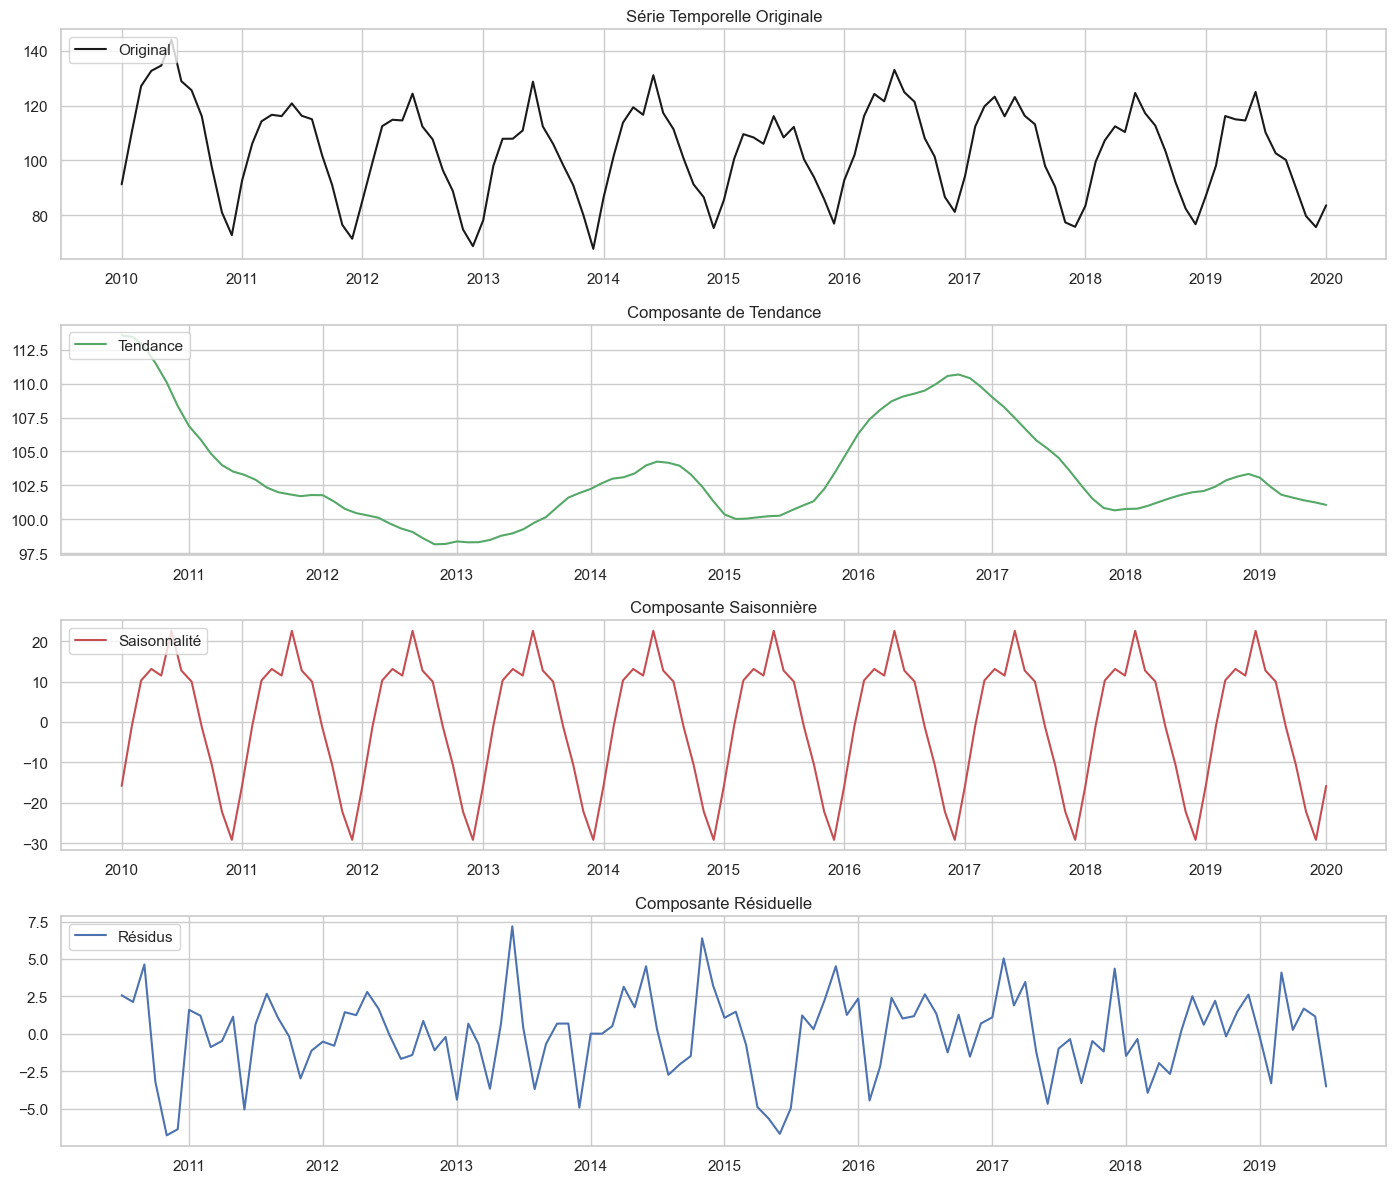

In [45]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# D√©composition de la s√©rie
decomposition = seasonal_decompose(data1['SALES'], 
                                  model='additive',  # ou 'multiplicative'
                                  period=12)  # p√©riode de saisonnalit√© (√† partir de cette resultat "<MonthBegin>" si vous rapplez)

# Extraction des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisation
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))

# S√©rie originale
ax1.plot(data1['SALES'], 'k', label='Original')
ax1.legend(loc='upper left')
ax1.set_title('S√©rie Temporelle Originale')

# Tendance
ax2.plot(trend, 'g', label='Tendance')
ax2.legend(loc='upper left')
ax2.set_title('Composante de Tendance')

# Saisonnalit√©
ax3.plot(seasonal, 'r', label='Saisonnalit√©')
ax3.legend(loc='upper left')
ax3.set_title('Composante Saisonni√®re')

# R√©sidus
ax4.plot(residual, 'b', label='R√©sidus')
ax4.legend(loc='upper left')
ax4.set_title('Composante R√©siduelle')

plt.tight_layout()
plt.show()

## 2. M√©thode avanc√©e : D√©composition STL (Seasonal and Trend decomposition using Loess)

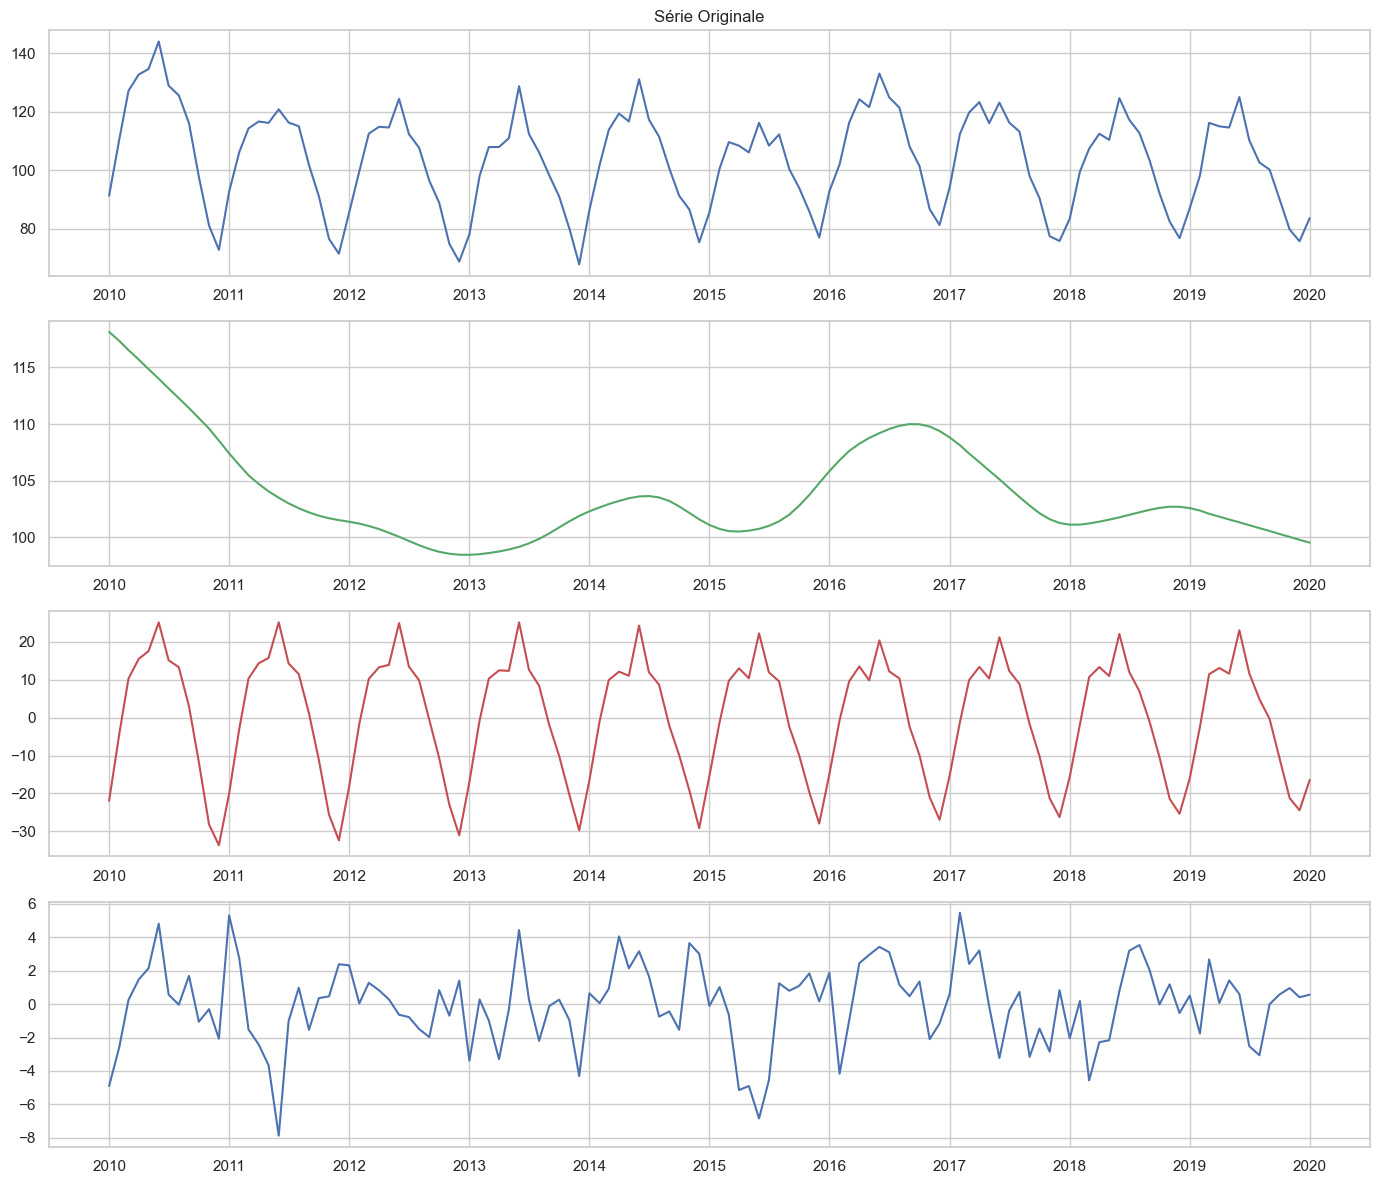

In [48]:
from statsmodels.tsa.seasonal import STL

# D√©composition STL (plus flexible que seasonal_decompose)
stl = STL(data1['SALES'], 
          period=12,  # p√©riode saisonni√®re
          trend=None)  # laisse le mod√®le d√©terminer automatiquement
res = stl.fit()

# Visualisation
fig, axes = plt.subplots(4, 1, figsize=(14, 12))
axes[0].plot(data1['SALES'])
axes[0].set_title('S√©rie Originale')
axes[1].plot(res.trend, 'g', label='Tendance')
axes[2].plot(res.seasonal, 'r', label='Saisonnalit√©')
axes[3].plot(res.resid, 'b', label='R√©sidus')
plt.tight_layout()
plt.show()

## üìä Analyse des Graphiques ACF et PACF



### üîπ Introduction  

L'**Autocorrelation Function (ACF)** et la **Partial Autocorrelation Function (PACF)** sont des outils essentiels pour analyser les d√©pendances temporelles d'une s√©rie. Elles permettent d'identifier si une s√©rie est stationnaire et d'aider au choix du mod√®le pour la mod√©lisation (ARIMA, etc.).  



### üîπ 1. Fonction d'Autocorr√©lation (ACF)

L'ACF mesure la corr√©lation entre une observation et ses valeurs d√©cal√©es (*lags*). Elle est d√©finie comme suit :

$$
p(k) = \frac{\alpha(k)}{\alpha(0)}
$$

üìå **Propri√©t√©s :**  

- Œ±(k)=Cov(y_t,y_t‚àík)=E[(y_t‚àíŒº)(y_t‚àík‚àíŒº)]
- p(0) = 1  (une s√©rie est parfaitement corr√©l√©e avec elle-m√™me).  
- p(k) = p(-k) ‚Üí **Sym√©trie** par rapport √† l'axe des ordonn√©es.  
- L'autocorr√©lation  p(k) est une normalisation de l'autocovariance Œ±(k), o√π \( k \) repr√©sente le d√©calage (*lag*).
-  **Pourquoi Normaliser l'Autocovariance ?**
  
     ‚Ä¢l'Autocovariance Œ±(k) mesure la relation lin√©aire entre les valeurs d'une s√©rie √† deux instants diff√©rents t et t‚àík. Elle d√©pend de la variance des deux s√©ries, donc de l'unit√© de mesure de la s√©rie, ce qui rend difficile la comparaison directe entre diff√©rentes s√©ries.

     ‚Ä¢l'Autocorr√©lation p(k), en revanche, est une version "normalis√©e" de l'autocovariance. Elle √©limine l'effet de la variance des s√©ries et rend la mesure sans dimension.


### üîπ 2. Comment cette normalisation est faite

**In√©galit√© de Cauchy-Schwarz**

L'in√©galit√© de Cauchy-Schwarz (ou in√©galit√© de Cauchy-Schwarz en statistique) est une propri√©t√© fondamentale qui nous aide √† comprendre pourquoi \( p(k) \) reste entre \(-1\) et \(1\). 

L'in√©galit√© de Cauchy-Schwarz stipule que pour deux variables al√©atoires \( X \) et \( Y \), la covariance Cov(X,Y) satisfait :

$$
|\text{Cov}(X, Y)| \leq \sqrt{\text{Var}(X) \times \text{Var}(Y)}
$$

Appliqu√©e √† notre s√©rie temporelle \( y_t \), cela donne :

$$
|\alpha(k)| = |\text{Cov}(y_t, y_{t-k})| \leq \sqrt{\alpha(0) \times \alpha(0)} = \alpha(0)
$$

Donc, l'autocovariance  l'autocovariance Œ±(k) est toujours inf√©rieure ou √©gale √† la variance 
Œ±(0). Cela

$$
|\alpha(k)| \leq \alpha(0)
$$

Cela implique que, lorsqu'on normalise par la variance, on obtient :

$$
|p(k)| = \left| \frac{\alpha(k)}{\alpha(0)} \right| \leq 1
$$




### üîπ 3. Interpr√©tation de l'ACF  

üìå **Si p(k)  d√©cro√Æt rapidement vers 0 :**  
‚úÖ **Pas de d√©pendance √† long terme**  
‚úÖ **La s√©rie est stationnaire** ‚Üí Elle a une m√©moire courte

#### Comment je comprends cela : je vais vous donner un exemple pour l'illustrer :
Imaginez un jeune homme ivre avec ses amis. √Ä un moment donn√©, il regarde la table et, en col√®re, il dit : "Les gars, o√π est mon t√©l√©phone ?". Il v√©rifie sa poche et trouve son t√©l√©phone, puis il dit : "Ah, il est l√†". Quelques instants plus tard, il refait exactement le m√™me geste, cherchant √† nouveau son t√©l√©phone, et ainsi de suite.

Cet exemple illustre une **m√©moire courte**, car l'action qu'il fait √† chaque fois (chercher son t√©l√©phone) est la m√™me et ne d√©pend pas de ses actions pr√©c√©dentes. Chaque geste est ind√©pendant des autres, tout comme une s√©rie temporelle stationnaire o√π les observations pass√©es n'affectent pas les futures. La stationnarit√© implique qu'il n'y a pas de d√©pendance √† long terme, et les comportements (ou les valeurs) √† un moment donn√© sont similaires √† ceux √† d'autres moments.


 


### üîπ 4. Fonction d'Autocorr√©lation Partielle (PACF)  

La **PACF** mesure la corr√©lation entre  y_t  et  y_{t-k} , **en √©liminant l'influence des lags interm√©diaires**. Elle est utile pour identifier le **terme autor√©gressif**  p  d'un mod√®le **AR(p)**.

üìå **Interpr√©tation du PACF :**  
- Si la PACF coupe rapidement apr√®s un certain lag **k**, cela sugg√®re un mod√®le **AR(k)**.  
- Si la PACF d√©cro√Æt lentement, cela peut indiquer une structure plus complexe, n√©cessitant une transformation de la s√©rie.  



## üîπ 5. Trac√© des Graphiques ACF et PACF avec `statsmodels`


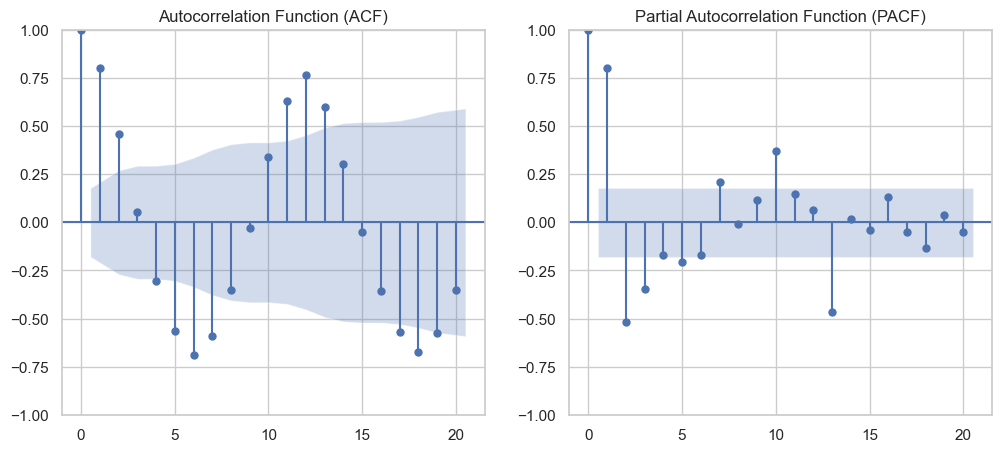

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Trac√© des graphiques ACF et PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(data1, ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(data1, ax=axes[1], lags=20)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

### Interpr√©tation des r√©sultats de l'ACF et PACF

#### ACF (Autocorrelation Function) :
- Dans la marge de 20 lags, on observe que la s√©rie d√©cro√Æt rapidement vers 0 juste apr√®s le 4√®me lag. Cela signifie qu'il n'y a pas de d√©pendance √† long terme dans les donn√©es.
- Cette observation sugg√®re que la s√©rie est **stationnaire**, car les autocorr√©lations √† des lags plus grands deviennent n√©gligeables, ce qui indique que la s√©rie n'a pas de tendance persistante au fil du temps.

#### PACF (Partial Autocorrelation Function) :
- On constate une chute nette √† \( k = 8 \), ce qui signifie qu'une **AR(8)** (mod√®le autor√©gressif d'ordre 8) serait le meilleur mod√®le pour d√©crire la structure de la s√©rie.
- Cette chute indique que l'autocorr√©lation partielle √† \( k = 8 \) est significative, mais les autocorr√©lations pour des lags plus grands ne le sont pas. Cela sugg√®re un mod√®le autor√©gressif simple avec un seul retard significatif.
---

# 4. Mod√©lisation

### üéØ Choix du mod√®le

- **Pour une s√©rie stationnaire** :  
  On envisage des mod√®les **AR**, **MA** ou **ARMA**. Ces mod√®les sont adapt√©s lorsque la s√©rie est stationnaire, c'est-√†-dire qu'elle n'a pas de tendance √† long terme et que ses caract√©ristiques statistiques sont constantes au fil du temps.

- **Pour une s√©rie non stationnaire** :  
  Si la s√©rie pr√©sente des tendances ou des comportements non stationnaires, on utilise un mod√®le **ARIMA** (AutoRegressive Integrated Moving Average). Ce mod√®le permet de rendre la s√©rie stationnaire en effectuant une diff√©renciation, ce qui est particuli√®rement utile lorsque la s√©rie pr√©sente des tendances √† long terme.
  
- **Pour les donn√©es saisonni√®res** :  
  Dans le cas o√π les donn√©es pr√©sentent une structure saisonni√®re, on opte pour un mod√®le **SARIMA** (Seasonal ARIMA) ou **SARIMAX** (SARIMA avec des variables exog√®nes). Ces mod√®les prennent en compte les effets saisonniers dans les donn√©es.

### üìå Application √† notre s√©rie

√âtant donn√© que notre s√©rie est d√©j√† **stationnaire**, il n'est pas n√©cessaire d'appliquer une transformation comme la diff√©renciation (qui est utilis√©e dans les mod√®les ARIMA pour rendre la s√©rie stationnaire). Par cons√©quent, nous allons nous concentrer sur les mod√®les **AR**, **MA** et **ARMA**.

En revanche, pour illustrer les mod√®les **ARIMA** et **SARIMA**,on va utiliser la partie **non saisonni√®re** des donn√©es de notre data icecream

---


# Mod√®les de S√©ries Temporelles : AR, MA et ARMA

## 1. Mod√®le AR(p) (AutoRegressif d'ordre p)

Un mod√®le **AR(p)** s'exprime par l'√©quation suivante :

$\Large y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t$

### Cas particulier : AR(1)

Pour un mod√®le **AR(1)**, l'√©quation se simplifie √† :

$\Large y_t = q \cdot y_{t-1} + \epsilon_t$

Avec :
* $q$ : coefficient de r√©gression pour le retard $t-1$
* $\epsilon_t$ : terme d'erreur √† l'instant $t$ (bruit blanc)
* $y_t$ : valeur de la s√©rie √† l'instant $t$

Par r√©currence, on peut exprimer $(c'est le MA)y_t$ sous la forme :

$\Large y_t = q^t \cdot y_0 + \sum_{k=0}^{t-1} q^k \cdot \epsilon_{t-k}$

*Note: Pour que le processus soit stationnaire, il faut que* $|q| < 1$

## 2. Mod√®le MA(q) (Moyenne Mobile d'ordre q)

Un mod√®le **MA(q)** est d√©fini par :

$\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}$

Avec :
* $\mu$ : moyenne de la s√©rie
* $\theta_k$ : coefficient pour l'erreur √† l'instant $t-k$
* $\epsilon_t$ : innovation (bruit blanc) √† l'instant $t$
* $q$ : ordre du mod√®le MA

*Note: Un processus MA est toujours stationnaire*

## 3. Mod√®le ARMA(p, q) 

Le mod√®le **ARMA(p, q)** (AutoRegressif et Moyenne Mobile) combine les caract√©ristiques des mod√®les AR et MA :

$\Large y_t = c + \sum_{i=1}^p \phi_i y_{t-i} + \epsilon_t + \sum_{j=1}^q \theta_j \epsilon_{t-j}$

Avec :
* $p$ : ordre de la partie autor√©gressive
* $q$ : ordre de la partie moyenne mobile
* $\phi_i$ : coefficients AR
* $\theta_j$ : coefficients MA
* $c$ : constante
* $\epsilon_t$ : bruit blanc

*Note: La stationnarit√© d√©pend uniquement de la partie AR*

### Conditions de stationnarit√© :
- Pour AR/ARMA : les racines du polyn√¥me $1 - \phi_1z - \phi_2z^2 - ... - \phi_pz^p = 0$ doivent √™tre √† l'ext√©rieur du cercle unit√©
- Pour MA : toujours stationnaire par constructionne mobile (influence des erreurs pass√©es)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


 #### üìå 3. S√©paration des donn√©es en jeu d'entra√Ænement et de test

In [91]:
train_end = '2018-12-31'
test_start = '2019-01-01'
test_end = '2020-01-01'

train_data = data1[:train_end]
test_data = data1[test_start:test_end]
y_train = train_data['SALES']
y_test = test_data['SALES']

**Pourquoi ne pas utiliser train_test_split de Scikit-Learn ?**

La fonction train_test_split est g√©n√©ralement utilis√©e pour diviser des donn√©es al√©atoirement, ce qui est utile pour les donn√©es ind√©pendantes et identiquement distribu√©es (IID). Cependant, pour les s√©ries temporelles, l‚Äôordre des observations est crucial car les valeurs futures d√©pendent des valeurs pass√©es. Une s√©paration al√©atoire casserait la structure temporelle et emp√™cherait le mod√®le d‚Äôapprendre correctement.

#### üìå 4. Mod√©lisation avec AR, MA et ARMA

In [95]:
AR_model = sm.tsa.AutoReg(y_train, lags=8)
AR_results = AR_model.fit()

ma_model = ARIMA(y_train, order=(0, 0, 16))
ma_results = ma_model.fit()

arma_model = ARIMA(y_train, order=(8, 0, 16))
arma_results = arma_model.fit()

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### üìå 5. Pr√©visions pour 2019-2020

In [97]:
forecast_horizon = len(test_data)
ar_forecast = AR_results.forecast(steps=forecast_horizon)
ma_forecast = ma_results.forecast(steps=forecast_horizon)
arma_forecast = arma_results.forecast(steps=forecast_horizon)

 #### üìå 6. Cr√©ation d‚Äôun DataFrame pour stocker les pr√©visions

In [101]:
forecast_index = pd.date_range(start=test_start, periods=forecast_horizon, freq='MS')
#On cr√©e un index temporel mensuel (MS = Month Start)
forecast_df = pd.DataFrame(index=forecast_index)
forecast_df['AR(8)'] = np.array(ar_forecast)
forecast_df['MA(16)'] = np.array(ma_forecast)
forecast_df['ARMA(8,16)'] = np.array(arma_forecast)

**Pourquoi utiliser np.array() ici ?**

**1.Uniformisation des formats**

Certaines m√©thodes de pr√©vision (forecast(), get_forecast(), etc.) renvoient des objets qui ne sont pas directement compatibles avec Pandas, comme des listes, s√©ries Pandas ou objets sp√©cifiques de statsmodels.
np.array() garantit que les valeurs sont bien sous forme de tableau NumPy, ce qui √©vite des erreurs d'alignement ou d'incompatibilit√© avec Pandas.

**2.Assurer la compatibilit√© avec Pandas**

forecast_df['AR(8)'] = ar_forecast pourrait poser probl√®me si ar_forecast est un objet complexe (comme une S√©rie Pandas avec un index diff√©rent). En le convertissant en tableau NumPy, on force une correspondance stricte entre les indices du DataFrame et les valeurs.

**3.Pr√©venir d'√©ventuelles erreurs de type**

Parfois, certaines fonctions de statsmodels retournent des objets non directement indexables par Pandas. L'utilisation de np.array() aide √† s'assurer que les donn√©es sont bien sous forme de tableau num√©rique.

Dans notre cas ,si on n'utilise pas cette convertissement on aura un probleme ( des valeurs NaN dans les pr√©visions ).

#### üìå 7. Ajout des intervalles de confiance pour ARMA

In [105]:
arma_forecast_obj = arma_results.get_forecast(steps=forecast_horizon)
arma_confidence = arma_forecast_obj.conf_int()
forecast_df['ARMA_Lower_CI'] = arma_confidence.iloc[:, 0].values
forecast_df['ARMA_Upper_CI'] = arma_confidence.iloc[:, 1].values
#Les intervalles de confiance permettent d‚Äôestimer l‚Äôincertitude des pr√©visions.

#### üìå 8. Pr√©visions futures (2020-2021)

In [108]:
future_horizon = 36  
future_start = test_end  
future_index = pd.date_range(start=future_start, periods=future_horizon, freq='MS')

ar_future_forecast = AR_results.forecast(steps=future_horizon)
ma_future_forecast = ma_results.forecast(steps=future_horizon)
arma_future_forecast_obj = arma_results.get_forecast(steps=future_horizon)
arma_future_forecast = arma_future_forecast_obj.predicted_mean
arma_future_confidence = arma_future_forecast_obj.conf_int()

#### üìå 9. Stockage des pr√©visions futures

In [111]:
future_forecast_df = pd.DataFrame(index=future_index)
future_forecast_df['AR(8)'] = np.array(ar_future_forecast)
future_forecast_df['MA(16)'] = np.array(ma_future_forecast)
future_forecast_df['ARMA(8,16)'] = np.array(arma_future_forecast)
future_forecast_df['ARMA_Lower_CI'] = arma_future_confidence.iloc[:, 0].values
future_forecast_df['ARMA_Upper_CI'] = arma_future_confidence.iloc[:, 1].values

#### üìå 10. Visualisation des r√©sultats

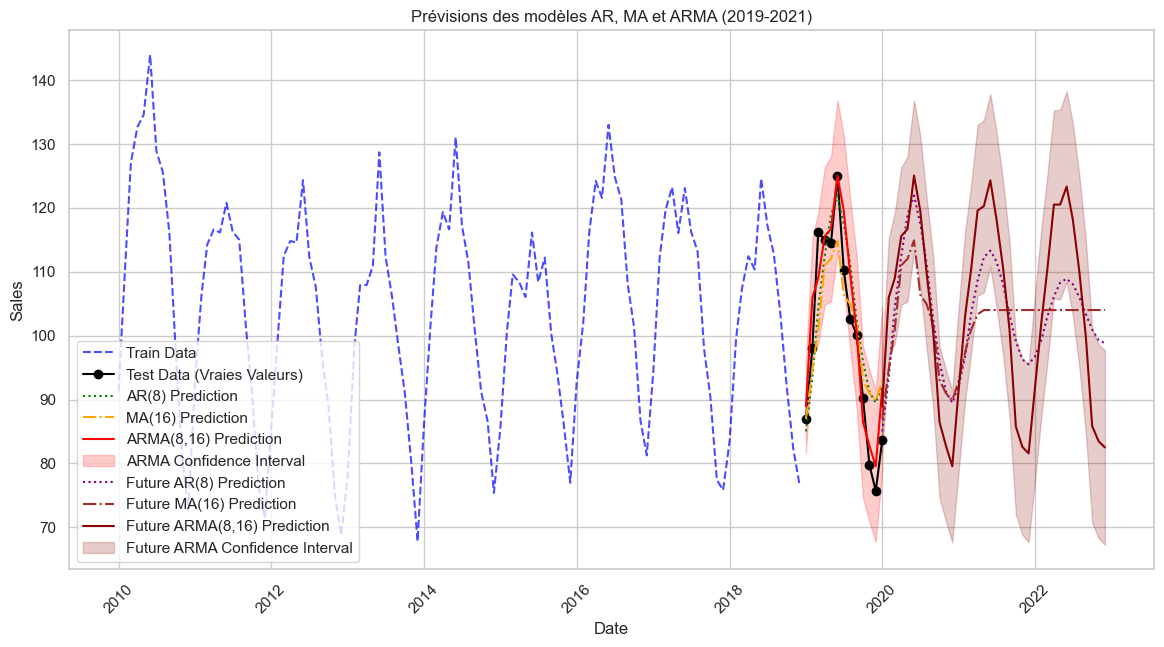

In [114]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# üîµ Donn√©es r√©elles
plt.plot(train_data.index, train_data.values, label='Train Data', color='blue', linestyle='dashed', alpha=0.7)
plt.plot(test_data.index, test_data.values, label='Test Data (Vraies Valeurs)', color='black', marker='o')

# üî¥ Pr√©dictions (2019-2020)
plt.plot(forecast_df.index, forecast_df['AR(8)'], label='AR(8) Prediction', color='green', linestyle='dotted')
plt.plot(forecast_df.index, forecast_df['MA(16)'], label='MA(16) Prediction', color='orange', linestyle='dashdot')
plt.plot(forecast_df.index, forecast_df['ARMA(8,16)'], label='ARMA(8,16) Prediction', color='red')

# Intervalle de confiance ARMA (2019-2020)
plt.fill_between(forecast_df.index, forecast_df['ARMA_Lower_CI'], forecast_df['ARMA_Upper_CI'],
                 color='red', alpha=0.2, label="ARMA Confidence Interval")

# üü£ Pr√©dictions futures (2020-2021)
plt.plot(future_forecast_df.index, future_forecast_df['AR(8)'], label='Future AR(8) Prediction', color='purple', linestyle='dotted')
plt.plot(future_forecast_df.index, future_forecast_df['MA(16)'], label='Future MA(16) Prediction', color='brown', linestyle='dashdot')
plt.plot(future_forecast_df.index, future_forecast_df['ARMA(8,16)'], label='Future ARMA(8,16) Prediction', color='darkred')

# Intervalle de confiance ARMA (2020-2021)
plt.fill_between(future_forecast_df.index, future_forecast_df['ARMA_Lower_CI'], future_forecast_df['ARMA_Upper_CI'],
                 color='darkred', alpha=0.2, label="Future ARMA Confidence Interval")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Pr√©visions des mod√®les AR, MA et ARMA (2019-2021)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **Analyse et Pr√©vision avec ARIMA sur des Donn√©es Non Stationnaires**

Nous allons :  
1. Explorer une s√©rie temporelle non stationnaire.  
2. Tester la stationnarit√© et appliquer la diff√©renciation si n√©cessaire.  
3. Ajuster un mod√®le ARIMA et comparer les r√©sultats.  



In [117]:
start_data=pd.to_datetime('1990-01-01')
end_data=pd.to_datetime('2010-01-01')
data2=data[start_data:end_data]
data2.tail()

SALES
DATE                
2009-09-01  119.4439
2009-10-01  106.7741
2009-11-01   87.8541
2009-12-01   77.7939
2010-01-01   91.2895

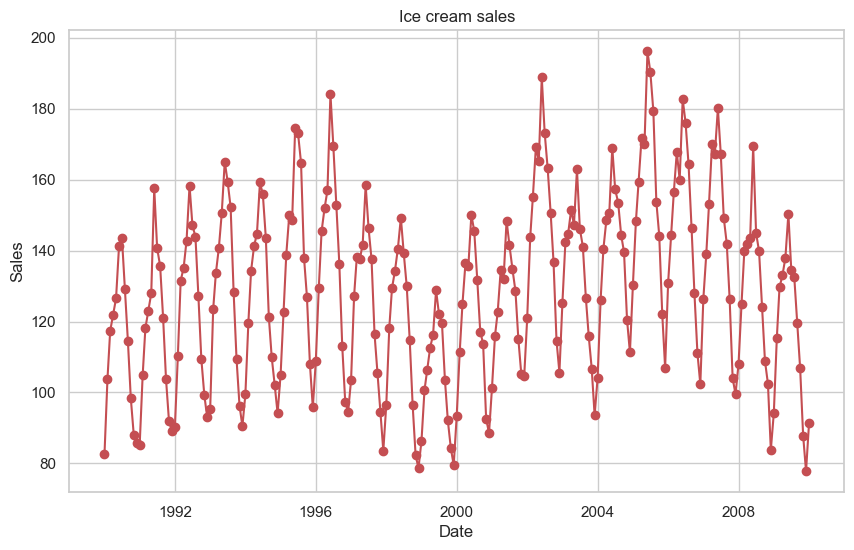

In [119]:
plt.figure(figsize=(10,6))
plt.plot(data2,marker='o',color='r',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ice cream sales')
plt.show()

### üìä Testons la stationnarit√© de la s√©rie data2

In [122]:
print("üìà Test de stationnarit√© avec ADF sur data2:")
Stationnarite_test_adf(data2)


üìà Test de stationnarit√© avec ADF sur data2:
ADF Statistic : -2.749033
p-value :0.065931
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574


üîπ Analyse :
- La statistique ADF (-2.749033) est sup√©rieure au seuil critique √† 5% (-2.874), ce qui signifie que nous ne pouvons pas rejeter l'hypoth√®se nulle H0.
- La p-value (0.065931) est sup√©rieure √† 0.05, ce qui confirme √©galement que nous ne rejetons pas H0 .
- ‚ö†Ô∏è Conclusion :
La s√©rie n'est pas stationnaire

---

# üìå **Diff√©renciation et Stationnarisation des S√©ries Temporelles**

Le mod√®le **ARIMA (AutoRegressive Integrated Moving Average)** est con√ßu pour traiter les s√©ries temporelles **non stationnaires**. Contrairement aux mod√®les **AR (AutoRegressive)** et **MA (Moving Average)**, ARIMA inclut une **√©tape de diff√©renciation** permettant de transformer une s√©rie non stationnaire en une s√©rie stationnaire avant d'appliquer les mod√®les AR et MA.

---

## üîπ **Formulation Math√©matique d'ARIMA**
Le mod√®le ARIMA(\(p, d, q\)) inclut une op√©ration de diff√©renciation d‚Äôordre \( d \), d√©finie par :

$$
\Delta^d y_t = (1 - B)^d y_t
$$

o√π :
- \( B \) est l‚Äô**op√©rateur de retard**, d√©fini par \( B y_t = y_{t-1} \),  
- \( d \) repr√©sente le **nombre de diff√©renciations n√©cessaires** pour rendre la s√©rie stationnaire.

---


### üîç **M√©thodes courantes pour stationnariser une s√©rie**
1. **Transformation logarithmique**  
   - Utile lorsque l'amplitude des fluctuations augmente avec le niveau de la s√©rie.  
   - D√©finition :  
     $$
     z_t = \log(y_t)
     $$

2. **Moyenne mobile (SMA - Simple Moving Average)**  
   - Permet de lisser la s√©rie en r√©duisant les fluctuations √† court terme.
   - D√©finition pour une fen√™tre de taille \( k \) :  
     $$
     SMA_t = \frac{1}{k} \sum_{i=0}^{k-1} y_{t-i}
     $$

3. **Diff√©renciation (op√©ration cl√© d'ARIMA)**  
   - √âlimine les tendances √† long terme pour rendre la s√©rie plus stationnaire.
   - **Premi√®re diff√©renciation** :  
     $$
     \Delta y_t = y_t - y_{t-1}
     $$
     Ceci peut √™tre r√©√©crit sous forme d'op√©rateur de retard \( B \) :  
     $$
     \Delta y_t = (1 - B) y_t = y_t - B y_t = y_t - y_{t-1}
     $$
     Cette op√©ration est utilis√©e lorsque la s√©rie suit une tendance lin√©aire.

   - **Deuxi√®me diff√©renciation** (si la tendance est plus complexe) :  
     $$
     \Delta^2 y_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})
     $$
     Ce qui revient √† :  
     $$
     \Delta^2 y_t = y_t - 2y_{t-1} + y_{t-2}
     $$
     Cette op√©ration est utilis√©e lorsque la s√©rie suit une tendance quadratique.

‚ÑπÔ∏è **Remarque :**  
Apr√®s diff√©renciation, les pr√©visions sont faites sur la s√©rie transform√©e \( \Delta y_t \), puis reconstruites en ajoutant \( y_{t-1} \).

---

## üîπ **Illustration de la Diff√©renciation avec Python**

üìâ Test ADF apr√®s diff√©renciation :
ADF Statistic : -3.469339
p-value :0.008810
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574


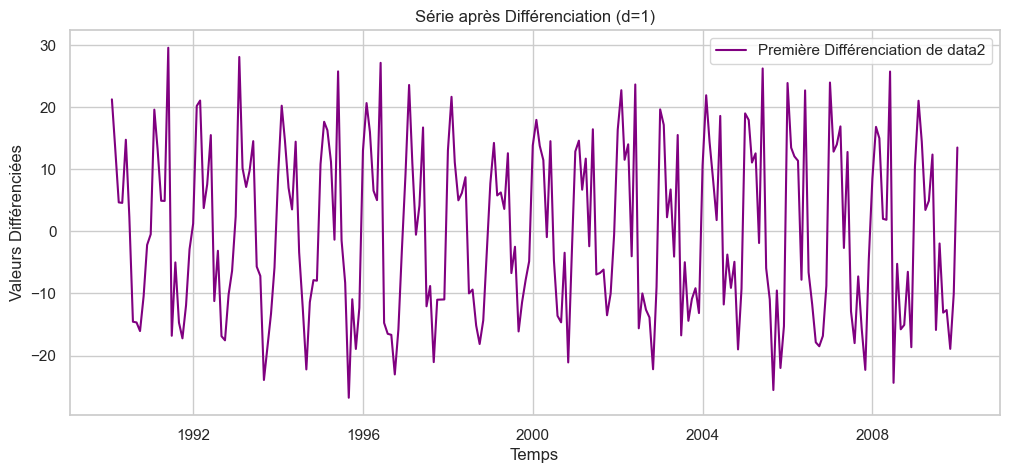

In [126]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üîπ Charger les donn√©es (assurez-vous que 'data2' est d√©fini)
# data2 = pd.read_csv("chemin_vers_fichier.csv", index_col="date", parse_dates=True)

# üü† Appliquer la premi√®re diff√©renciation sur la s√©rie non stationnaire
data2_diff = data2.diff().dropna()

# üìâ Tester la stationnarit√© apr√®s diff√©renciation
print("üìâ Test ADF apr√®s diff√©renciation :")
Stationnarite_test_adf(data2_diff)

# üìà Visualisation de la s√©rie apr√®s diff√©renciation
plt.figure(figsize=(12, 5))
plt.plot(data2_diff, color='purple', label="Premi√®re Diff√©renciation de data2")
plt.title("S√©rie apr√®s Diff√©renciation (d=1)")
plt.xlabel("Temps")
plt.ylabel("Valeurs Diff√©renci√©es")
plt.legend()
plt.show()


### üéâ Abracadabra ! La s√©rie est maintenant clairement stationnaire.

In [129]:
# modelisation avec arima :


#### üìå 1. S√©paration des donn√©es en jeu d'entra√Ænement et de test

In [201]:
# D√©finition des p√©riodes d'entra√Ænement et de test
train_end = '2004-12-31'
test_start = '2005-01-01'
test_end = '2010-01-01'

# S√©paration des donn√©es
train_data = data2.loc[:train_end]
test_data = data2.loc[test_start:test_end]

# S√©paration des valeurs cibles (SALES)
y_train = train_data['SALES']
y_test = test_data['SALES']

# Cr√©ation et ajustement du mod√®le ARIMA
arima_model = ARIMA(y_train, order=(8, 1, 16))  
arima_results = arima_model.fit()

# Pr√©visions (avec gestion correcte des indices)
forecast_horizon = len(test_data)
arima_forecast = arima_results.forecast(steps=forecast_horizon, typ='levels')

# Cr√©ation d'un DataFrame pour stocker les pr√©visions avec les dates correspondantes
forecast_index = test_data.index
forecast_df = pd.DataFrame({'Forecast': arima_forecast}, index=forecast_index)




C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [203]:
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                  180
Model:                ARIMA(8, 1, 16)   Log Likelihood                -559.523
Date:                Thu, 20 Feb 2025   AIC                           1169.046
Time:                        12:15:46   BIC                           1248.731
Sample:                    01-01-1990   HQIC                          1201.358
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1750      0.262     -0.668      0.504      -0.689       0.339
ar.L2          0.0138      0.163      0.084      0.933      -0.306       0.334
ar.L3         -0.0565      0.147     -0.385      0.7

## üìä Analyse des R√©sultats du Mod√®le 

Nous avons ajust√© un **ARIMA(8,1,16)** sur notre s√©rie temporelle et obtenu les r√©sultats suivants :

---

## üîç R√©sum√© du Mod√®le  
- **Mod√®le s√©lectionn√©** : `ARIMA(8,1,16)`
- **Nombre d'observations** : 180
- **Log-Likelihood** : -559.523
- **AIC (Akaike Information Criterion)** : 1169.046  
  ‚Üí Plus l'AIC est bas, meilleur est le mod√®le.  
- **BIC (Bayesian Information Criterion)** : 1248.731  
  ‚Üí Le BIC p√©nalise plus les mod√®les complexes.

---

## üìà Interpr√©tation des Coefficients  

### üìå **Partie AR (Auto-Regressive)**  
Les coefficients **ar.L1 √† ar.L8** repr√©sentent les **termes auto-r√©gressifs** :  
- Certains sont significatifs (**p-valeur < 0.05**, comme `ar.L4`, `ar.L5`, `ar.L6`, `ar.L7`).
- D'autres ne le sont pas (`ar.L1`, `ar.L2`, `ar.L3`, `ar.L8` ‚Üí **peu de contribution**).

### üìå **Partie MA (Moving Average)**  
Les coefficients **ma.L1 √† ma.L16** capturent la **moyenne mobile** :  
- Seuls quelques termes ont un impact notable (`ma.L6` avec **p = 0.086**, `ma.L10` avec **p = 0.104**).
- Beaucoup de coefficients ne sont pas significatifs (**p > 0.05**), sugg√©rant un surajustement.

### üìå **Sigma¬≤**  
- **Valeur estim√©e** : `24.6148`  
  ‚Üí Indique la variance de l'erreur r√©siduelle.  
  ‚Üí Plus **sigma¬≤ est faible**, plus le mod√®le est pr√©cis.

---

## üìä Tests Statistiques  

### ‚úÖ **Ljung-Box Test** (Autocorr√©lation des r√©sidus)  
- **Q-Stat** : `0.11`  
- **Probabilit√© (p-value)** : `0.74`  
  ‚Üí **Si p > 0.05**, il **n'y a pas d'autocorr√©lation significative** dans les r√©sidus.  
  ‚Üí Ici, **nos r√©sidus semblent ind√©pendants** (pas d'autocorr√©lation g√™nante).

### ‚úÖ **Jarque-Bera Test** (Normalit√© des r√©sidus)  
- **Statistique** : `1.39`  
- **p-value** : `0.50`  
  ‚Üí **Si p > 0.05**, on ne rejette pas l'hypoth√®se de normalit√©.  
  ‚Üí Ici, **nos r√©sidus suivent une distribution normale** (bon signe pour un bon ajustement).

### ‚úÖ **Heteroskedasticity (H Test)**  
- **H = 1.43**, **p = 0.17**  
  ‚Üí Aucune **h√©t√©rosc√©dasticit√© significative** d√©tect√©e (les erreurs semblent constantes).

---

## ‚ùå Probl√®mes Identifi√©s  

1. **Surajustement possible**  
   - Beaucoup de **termes MA non significatifs**.
   - Peut-√™tre qu'un mod√®le **plus simple** donnerait **des r√©sultats similaires**.

2. **Meilleure prise en compte de la saisonnalit√©**  
   - La s√©rie √©tant **saisonni√®re**, un **SARIMA** serait peut-√™tre plus efficace qu'un simple **ARIMA**.


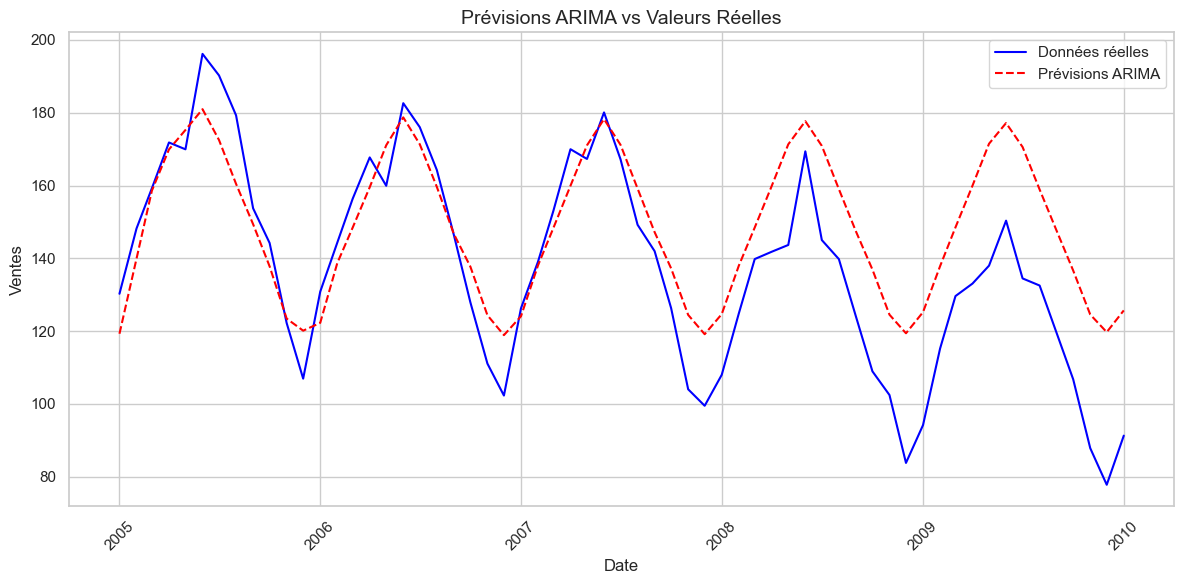

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Tracer les donn√©es r√©elles
plt.plot(y_test.index, y_test, label='Donn√©es r√©elles', color='blue')

# Tracer les pr√©visions
plt.plot(forecast_df.index, forecast_df['Forecast'], 
         label='Pr√©visions ARIMA', color='red', linestyle='--')

# Personnalisation du graphique
plt.title('Pr√©visions ARIMA vs Valeurs R√©elles', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()

# Rotation des dates pour une meilleure lisibilit√©
plt.xticks(rotation=45)

# Ajuster automatiquement les marges
plt.tight_layout()

# Afficher le graphique
plt.show()

### üìä **Visualisation des R√©sultats**  
‚Ä¢ **Visualisation des pr√©visions** : Affichez les pr√©visions, les valeurs r√©elles et l'historique pour observer les diff√©rences.

‚Ä¢ **√âvaluation des performances** :  
   - Utilisez des m√©triques comme :
     - **MAE** (Mean Absolute Error)
     - **RMSE** (Root Mean Squared Error)
     - **MAPE** (Mean Absolute Percentage Error)  
   pour mesurer la qualit√© des pr√©visions.


MAE : 15.28
RMSE : 18.87
MAPE : 12.85%


C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


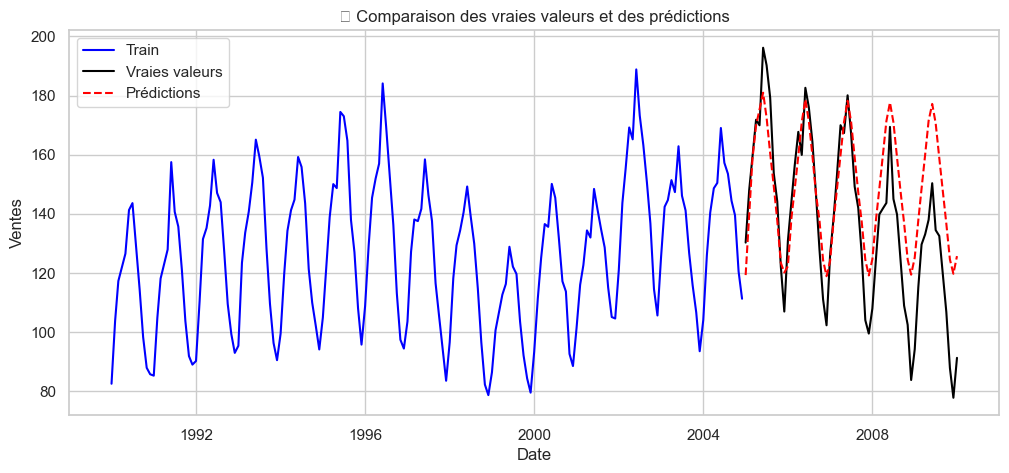

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


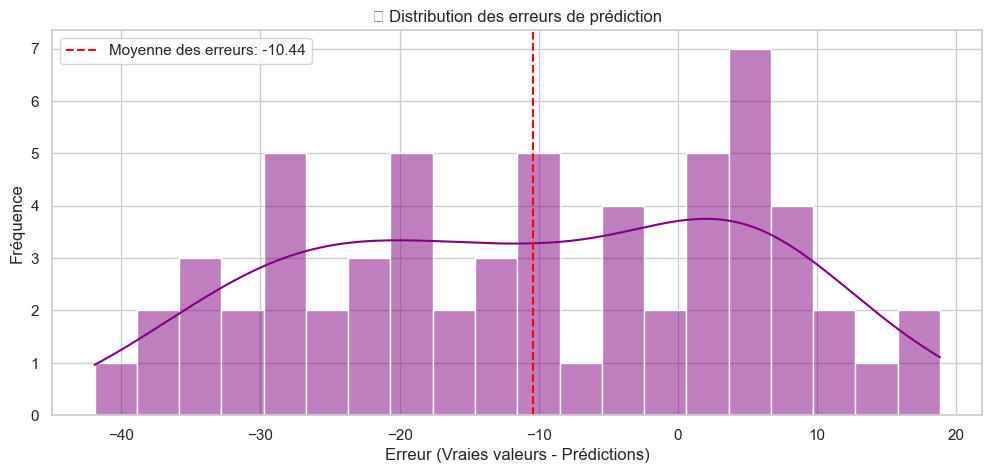

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


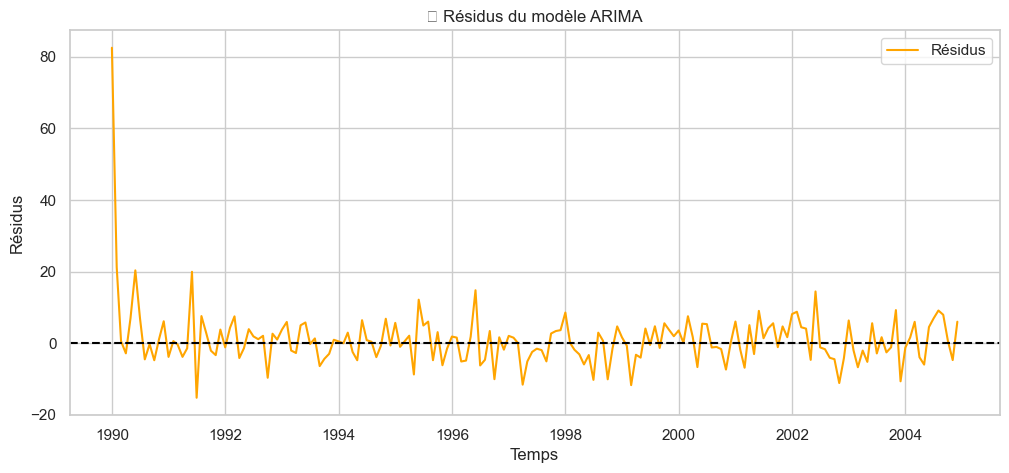

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


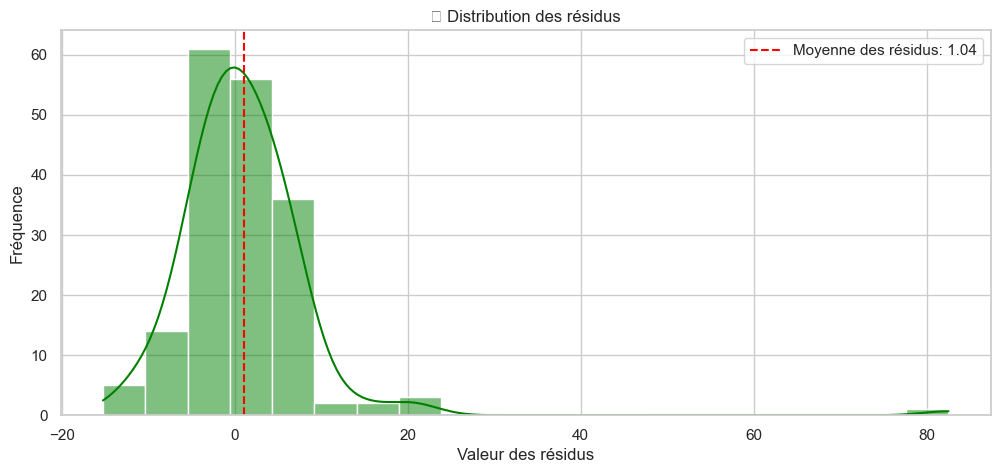

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
# Calcul des erreurs
mae = mean_absolute_error(test_data['SALES'], arima_forecast)
rmse = np.sqrt(mean_squared_error(test_data['SALES'], arima_forecast))
mape = np.mean(np.abs((test_data['SALES'] - arima_forecast) / test_data['SALES'])) * 100

# Affichage des m√©triques
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

test_data = test_data.copy()  # Pour √©viter l'avertissement SettingWithCopyWarning
test_data['Prediction'] = arima_forecast
# üìä  Graphique des vraies valeurs vs. pr√©dictions
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, train_data['SALES'], label='Train', color='blue')
plt.plot(test_data.index, test_data['SALES'], label='Vraies valeurs', color='black')
plt.plot(test_data.index, test_data['Prediction'], label='Pr√©dictions', color='red', linestyle='dashed')
plt.legend()
plt.title("üìà Comparaison des vraies valeurs et des pr√©dictions")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

# üìä  Distribution des erreurs (Vraies valeurs - Pr√©dictions)
errors = test_data['SALES'] - test_data['Prediction']
plt.figure(figsize=(12, 5))
sns.histplot(errors, bins=20, kde=True, color='purple')
plt.axvline(errors.mean(), color='red', linestyle='dashed', label=f"Moyenne des erreurs: {errors.mean():.2f}")
plt.legend()
plt.title("üìä Distribution des erreurs de pr√©diction")
plt.xlabel("Erreur (Vraies valeurs - Pr√©dictions)")
plt.ylabel("Fr√©quence")
plt.show()

# üìä Analyse des r√©sidus (diff√©rence entre les vraies valeurs et le mod√®le)
residuals = arima_results.resid
plt.figure(figsize=(12, 5))
plt.plot(residuals, label='R√©sidus', color='orange')
plt.axhline(0, color='black', linestyle='dashed')
plt.legend()
plt.title("üìâ R√©sidus du mod√®le ARIMA")
plt.xlabel("Temps")
plt.ylabel("R√©sidus")
plt.show()

# üìä  Graphique des r√©sidus en fonction du temps
plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', label=f"Moyenne des r√©sidus: {residuals.mean():.2f}")
plt.legend()
plt.title("üìâ Distribution des r√©sidus")
plt.xlabel("Valeur des r√©sidus")
plt.ylabel("Fr√©quence")
plt.show()


### ‚Ä¢ S√©lection des param√®tres :

- Utilisez des crit√®res d‚Äôinformation (AIC, BIC) pour d√©terminer les ordres p, d et q.

L'utilisation de cette m√©thode est un peu lourde dans notre cas, donc je vais vous montrer just la d√©marche.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# G√©n√©ration de donn√©es fictives
np.random.seed(42)
n = 100
time_series = np.cumsum(np.random.randn(n)) + 50  # S√©ries temporelles al√©atoires

dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = pd.DataFrame({'DATE': dates, 'SALES': time_series})
data.set_index('DATE', inplace=True)

# Division des donn√©es en ensemble d'entra√Ænement et de test
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# D√©finition des plages de valeurs pour p et q
p_values = range(0, 3)
q_values = range(0, 3)
d_values = range(0, 3)  # On peut utiliser n'importe quelle intervalle de recherche

best_aic = float("inf")
best_bic = float("inf")
best_order_aic = None
best_order_bic = None

results = []

# Recherche des meilleurs param√®tres (p, d, q)
for p in p_values:
    for q in q_values:
        for d in d_values:
            try:
                model = ARIMA(train_data['SALES'], order=(p, d, q))
                results_arima = model.fit()
                
                results.append({
                    'order': (p, d, q),
                    'aic': results_arima.aic,
                    'bic': results_arima.bic
                })
                
                if results_arima.aic < best_aic:
                    best_aic = results_arima.aic
                    best_order_aic = (p, d, q)
                
                if results_arima.bic < best_bic:
                    best_bic = results_arima.bic
                    best_order_bic = (p, d, q)
                    
            except:
                continue

print("\nMeilleur ordre selon AIC:", best_order_aic)
print("AIC:", best_aic)
print("\nMeilleur ordre selon BIC:", best_order_bic)
print("BIC:", best_bic)

```
---

### ‚Ä¢ S√©lection automatique des param√®tres ARIMA avec `pmdarima`

La fonction `auto_arima` de la biblioth√®que `pmdarima` permet d'automatiser le processus de s√©lection des param√®tres du mod√®le ARIMA (\( p, d, q \)). Au lieu de tester manuellement diff√©rentes combinaisons, `auto_arima` explore plusieurs configurations et choisit la meilleure en fonction de crit√®res d'information tels que **AIC** (Akaike Information Criterion) ou **BIC** (Bayesian Information Criterion).

#### ‚Ä¢ Explication du code :


pip install pmdarima

In [170]:
import pmdarima as pm

best_model = pm.auto_arima(data2, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1899.242, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3038.543, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2741.979, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1899.123, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1916.213, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1899.841, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1902.696, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1865.569, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1935.284, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1891.853, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1823.102, T

### Param√®tres de la fonction `auto_arima`

| Param√®tre            | Description |
|----------------------|------------|
| `data2`             | Les donn√©es d'entr√©e (une s√©rie temporelle). |
| `seasonal=False`    | Indique que l'on cherche un ARIMA (pas SARIMA), donc sans composante saisonni√®re. |
| `trace=True`        | Affiche les tests de diff√©rents mod√®les pendant l'entra√Ænement. |
| `error_action='ignore'` | Ignore les erreurs lors du test des combinaisons de param√®tres. |
| `suppress_warnings=True` | Supprime les avertissements inutiles pendant l'ex√©cution. |


---

### Analyse des r√©sultats de `auto_arima()`

L'auto-s√©lection des param√®tres avec `auto_arima()` a donn√© comme **meilleur mod√®le** :  
**ARIMA(4,0,3)**

Cependant, ce mod√®le reste un mauvais choix, car notre s√©rie **pr√©sente une saisonnalit√©**, et un ARIMA simple peut ne pas √™tre efficace.

### üèÜ Choix du Meilleur Mod√®le

Dans notre cas, apr√®s analyse du **PACF** :
- **p = 8** et **q = 16** semblent √™tre les meilleurs choix.
- **d = 1** est suffisant pour rendre notre s√©rie stationnaire.

Ainsi, **ARIMA(8,1,16) reste le mod√®le optimal pour le moment**.

---

### üîç Prochaine √âtape
- **Illustration de SARIMA** : Nous allons ensuite voir comment un mod√®le **SARIMA** peut am√©liorer les r√©sultats sur une s√©rie saisonni√®re.
- **Application d'ARIMA sur une s√©rie ni saisonni√®re ni stationnaire** : Enfin, nous testerons l'ARIMA sur un cas plus complexe.




## La principale diff√©rence entre **ARIMA** et **SARIMA** r√©side dans la prise en compte de la **saisonnalit√©**.

- **ARIMA (AutoRegressive Integrated Moving Average)** est un mod√®le statistique utilis√© pour analyser et pr√©dire des s√©ries temporelles non saisonni√®res. Il repose sur trois composants :  
  - **AR (AutoRegressive)** : d√©pendance des observations pass√©es.  
  - **I (Integrated)** : diff√©renciation pour rendre la s√©rie stationnaire.  
  - **MA (Moving Average)** : d√©pendance des erreurs pass√©es.  

- **SARIMA (Seasonal ARIMA)** est une extension d'ARIMA qui inclut un **composant saisonnier** pour capturer les variations p√©riodiques. Il ajoute quatre nouveaux param√®tres :  
  - **P (AutoRegressive saisonnier)**  
  - **D (Diff√©renciation saisonni√®re)**  
  - **Q (Moving Average saisonnier)**  
  - **m (p√©riode de la saisonnalit√©, par ex. 12 pour des donn√©es mensuelles)**  

### Quand utiliser ARIMA ou SARIMA ?
- **Si votre s√©rie temporelle ne pr√©sente pas de saisonnalit√© marqu√©e** ‚Üí **ARIMA**  
- **Si votre s√©rie temporelle pr√©sente des motifs saisonniers clairs** ‚Üí **SARIMA**  

Exemple d'application :  
- **ARIMA** : pr√©visions de ventes journali√®res sans tendance saisonni√®re claire.  
- **SARIMA** : pr√©visions de consommation d‚Äô√©lectricit√© avec des pics mensuels ou annuels.  


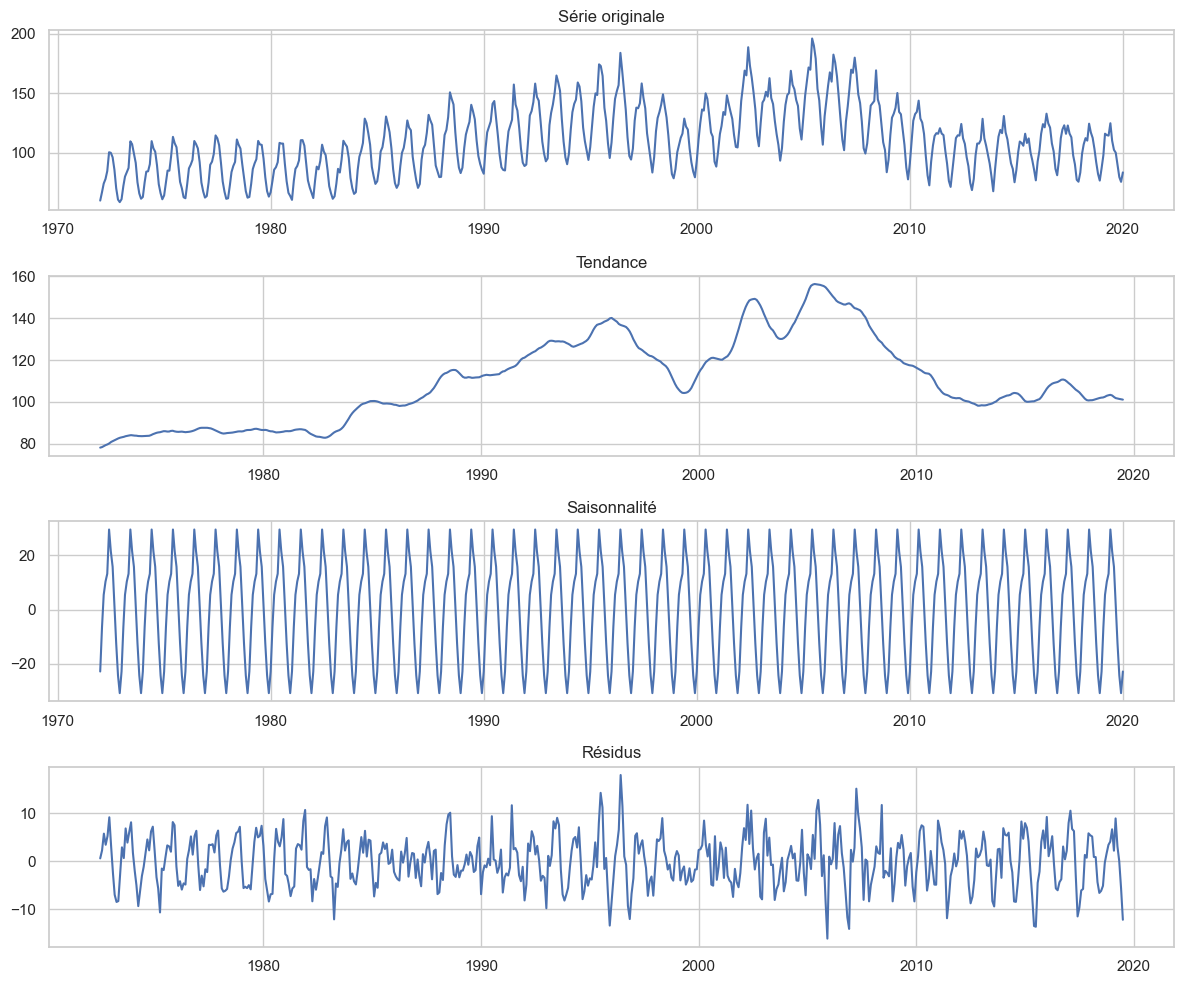

In [231]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=12)

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('S√©rie originale')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Tendance')
plt.subplot(413)
plt.plot(decomposition.seasonal)   
plt.title('Saisonnalit√©')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('R√©sidus')
plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1160.493, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1116.508, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1098.445, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1160.208, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1100.445, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1100.445, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1116.080, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1101.909, Time=1.26 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1100.328, Time=0.17 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1100.445, Time=0.48 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1100.444, Time=0.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1098.814, Time=0.22 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1097.367, Time=0.58 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1154.163, Time=0.30 sec
 ARIMA(1,1,2)(1,1,1

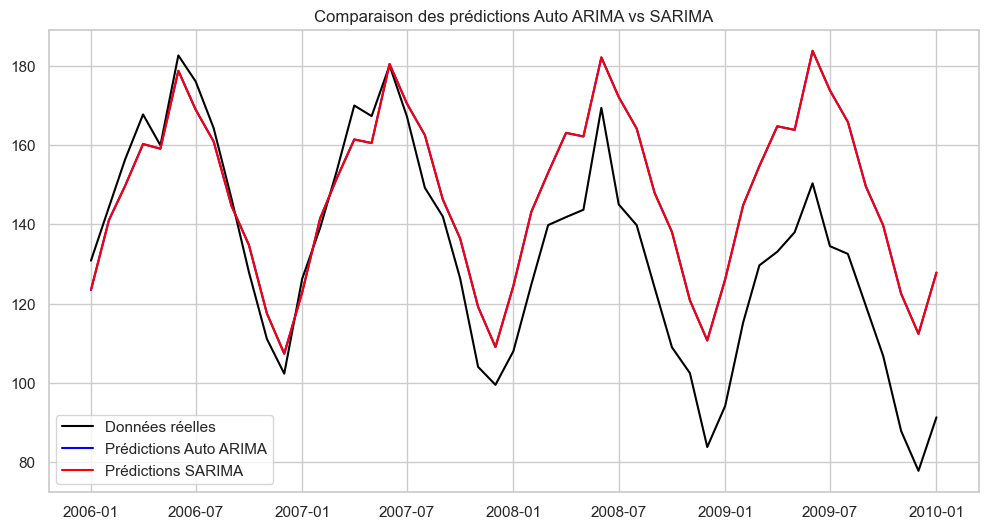


R√©sum√© du mod√®le SARIMA:
                                      SARIMAX Results                                       
Dep. Variable:                                SALES   No. Observations:                  192
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -539.953
Date:                              Thu, 20 Feb 2025   AIC                           1089.906
Time:                                      13:10:51   BIC                           1105.843
Sample:                                  01-01-1990   HQIC                          1096.368
                                       - 12-01-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1301      0.068     -1.902      0.057      -0.264   

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pmdarima as pm



# Pr√©paration des donn√©es
n = len(data2)
train_size = int(n * 0.8)
train_data = data2[:train_size]
test_data = data2[train_size:]

# Auto ARIMA pour trouver les meilleurs param√®tres
auto_arima = pm.auto_arima(train_data,
                          seasonal=True,
                          m=12,  # p√©riode mensuelle
                          d=1,   # diff√©renciation non-saisonni√®re
                          D=1,   # diff√©renciation saisonni√®re
                          start_p=0, start_q=0,
                          max_p=10, max_q=10,
                          start_P=0, start_Q=0,
                          max_P=2, max_Q=2,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True)

# R√©cup√©rer les ordres du mod√®le auto_arima
order = auto_arima.order  # (p,d,q)
seasonal_order = auto_arima.seasonal_order  # (P,D,Q,s)

print(f"\nMeilleurs param√®tres trouv√©s par auto_arima:")
print(f"Order (p,d,q): {order}")
print(f"Seasonal Order (P,D,Q,s): {seasonal_order}")

# Application du mod√®le SARIMA avec les param√®tres d'auto_arima
sarima_model = sm.tsa.SARIMAX(train_data,
                             order=order,
                             seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Pr√©dictions
auto_arima_pred = auto_arima.predict(n_periods=len(test_data))
sarima_pred = sarima_fit.forecast(len(test_data))

# √âvaluation des mod√®les
auto_arima_rmse = np.sqrt(mean_squared_error(test_data, auto_arima_pred))
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_pred))

print("\nPerformances des mod√®les:")
print(f"RMSE Auto ARIMA: {auto_arima_rmse:.2f}")
print(f"RMSE SARIMA: {sarima_rmse:.2f}")

# Visualisation des r√©sultats
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Donn√©es r√©elles', color='black')
plt.plot(test_data.index, auto_arima_pred, label='Pr√©dictions Auto ARIMA', color='blue')
plt.plot(test_data.index, sarima_pred, label='Pr√©dictions SARIMA', color='red')
plt.title('Comparaison des pr√©dictions Auto ARIMA vs SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du r√©sum√© du mod√®le SARIMA
print("\nR√©sum√© du mod√®le SARIMA:")
print(sarima_fit.summary())

## R√©sultats d√©taill√©s de la comparaison ARIMA(8,1,16) / SARIMA(3,1,0)(0,1,1,12) :

C:\Users\khali\AppData\Local\Temp\ipykernel_22888\1993588425.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mod√®le', y='RMSE', data=metrics_df, ax=ax1, palette=['blue', 'red'], alpha=0.7)
C:\Users\khali\AppData\Local\Temp\ipykernel_22888\1993588425.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mod√®le', y='MAE', data=metrics_df, ax=ax2, palette=['blue', 'red'], alpha=0.7)



R√©sultats d√©taill√©s de la comparaison:
                 Mod√®le      RMSE       MAE
          ARIMA(8,1,16) 18.802555 15.568864
SARIMA(3,1,0)(0,1,1,12) 20.385460 16.495530


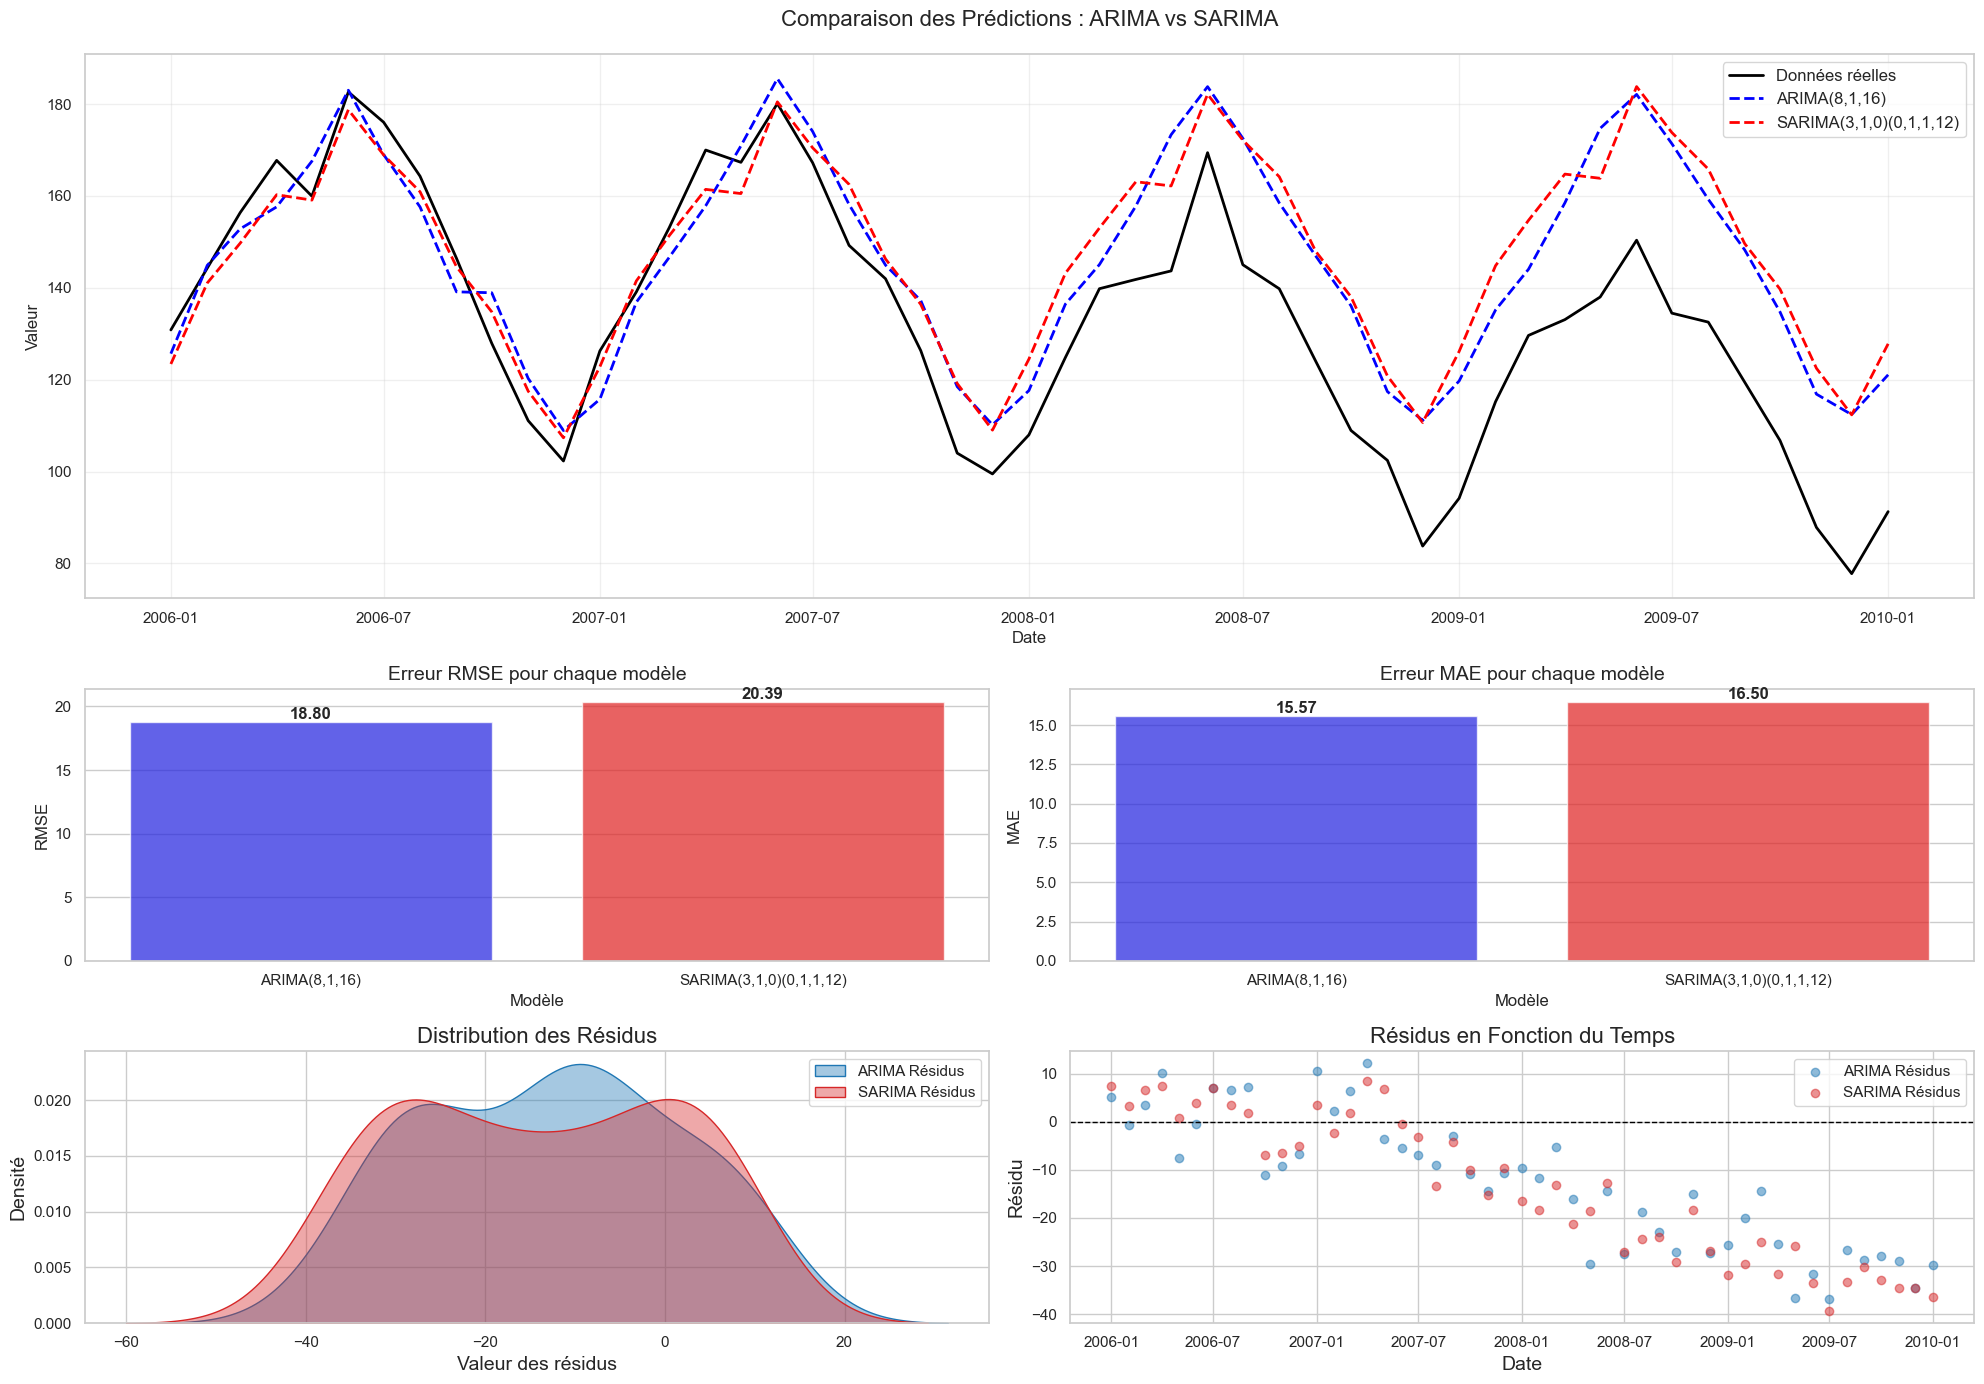

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.gridspec as gridspec


def plot_detailed_comparison(test_data, arima_pred, sarima_pred, arima_rmse, sarima_rmse, arima_mae, sarima_mae):
    # Configuration du style
    sns.set_style("whitegrid")
    
    # Cr√©ation de la figure avec une mise en page optimis√©e
    fig = plt.figure(figsize=(20, 14))
    gs = gridspec.GridSpec(3, 2, height_ratios=[2, 1, 1])
    
    # 1. Comparaison des pr√©dictions
    ax0 = plt.subplot(gs[0, :])
    ax0.plot(test_data.index, test_data, label='Donn√©es r√©elles', color='black', linewidth=2)
    ax0.plot(test_data.index, arima_pred, label='ARIMA(8,1,16)', color='blue', linestyle="--", linewidth=2)
    ax0.plot(test_data.index, sarima_pred, label='SARIMA(3,1,0)(0,1,1,12)', color='red', linestyle="--", linewidth=2)
    ax0.set_title('Comparaison des Pr√©dictions : ARIMA vs SARIMA', fontsize=16, pad=20)
    ax0.legend(loc='upper right', fontsize=12)
    ax0.grid(True, alpha=0.3)
    ax0.set_xlabel('Date', fontsize=12)
    ax0.set_ylabel('Valeur', fontsize=12)
    
    # 2. Comparaison des m√©triques d'erreur
    ax1 = plt.subplot(gs[1, 0])
    metrics_df = pd.DataFrame({
        'Mod√®le': ['ARIMA(8,1,16)', 'SARIMA(3,1,0)(0,1,1,12)'],
        'RMSE': [arima_rmse, sarima_rmse],
        'MAE': [arima_mae, sarima_mae]
    })
    
    sns.barplot(x='Mod√®le', y='RMSE', data=metrics_df, ax=ax1, palette=['blue', 'red'], alpha=0.7)
    ax1.set_title('Erreur RMSE pour chaque mod√®le', fontsize=14)
    ax1.set_ylabel('RMSE', fontsize=12)
    
    # Ajout des valeurs sur les barres
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax2 = plt.subplot(gs[1, 1])
    sns.barplot(x='Mod√®le', y='MAE', data=metrics_df, ax=ax2, palette=['blue', 'red'], alpha=0.7)
    ax2.set_title('Erreur MAE pour chaque mod√®le', fontsize=14)
    ax2.set_ylabel('MAE', fontsize=12)
    
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

    # 3. Distribution des r√©sidus
    arima_pred = np.array(arima_pred).flatten()
    sarima_pred = np.array(sarima_pred).flatten()
    test_data_values = np.array(test_data).flatten()

    # Aligning indices of predictions and test data for correct subtraction
    arima_resid = test_data_values - pd.Series(arima_pred, index=test_data.index)
    sarima_resid = test_data_values - pd.Series(sarima_pred, index=test_data.index)

    ax3 = plt.subplot(gs[2, 0])
    sns.kdeplot(arima_resid, label='ARIMA R√©sidus', color='#1f77b4', fill=True, alpha=0.4, ax=ax3)
    sns.kdeplot(sarima_resid, label='SARIMA R√©sidus', color='#d62728', fill=True, alpha=0.4, ax=ax3)
    ax3.set_title('Distribution des R√©sidus', fontsize=16)
    ax3.set_xlabel('Valeur des r√©sidus', fontsize=14)
    ax3.set_ylabel('Densit√©', fontsize=14)
    ax3.legend()

    # 4. Visualisation des r√©sidus sous forme de scatter plot
    ax4 = plt.subplot(gs[2, 1])
    
    # Ensure both x and y have the same length before plotting
    if len(test_data.index) == len(arima_resid):
        ax4.scatter(test_data.index, arima_resid, label='ARIMA R√©sidus', color='#1f77b4', alpha=0.5)
    if len(test_data.index) == len(sarima_resid):
        ax4.scatter(test_data.index, sarima_resid, label='SARIMA R√©sidus', color='#d62728', alpha=0.5)
    
    ax4.axhline(0, linestyle="--", color='black', linewidth=1)
    ax4.set_title('R√©sidus en Fonction du Temps', fontsize=16)
    ax4.set_xlabel('Date', fontsize=14)
    ax4.set_ylabel('R√©sidu', fontsize=14)
    ax4.legend()

    # Ajustement de la mise en page
    plt.tight_layout()
    
    # Affichage d'un tableau r√©capitulatif
    print("\nR√©sultats d√©taill√©s de la comparaison:")
    print("=====================================")
    print(metrics_df.to_string(index=False))

    plt.show()

# Utilisation de la fonction
plot_detailed_comparison(test_data, arima_pred, sarima_pred, arima_rmse, sarima_rmse, arima_mae, sarima_mae)


# Interpr√©tation des R√©sultats

Dans cette analyse, nous avons compar√© les performances de deux mod√®les de pr√©vision temporelle : **ARIMA(8,1,16)** et **SARIMA(3,1,0)(0,1,1,12)**. En observant les r√©sultats, on remarque que les performances des deux mod√®les sont relativement similaires. Cependant, l'utilisation du mod√®le **SARIMA** semble √™tre le meilleur choix pour ce cas particulier. Voici les points principaux de cette conclusion :

### 1. **Comparaison des Mod√®les**
   - **ARIMA(8,1,16)** a √©t√© ajust√© manuellement apr√®s une s√©rie d'analyses pour d√©terminer les param√®tres optimaux. Ce processus peut √™tre lourd et consommer beaucoup de temps, car il n√©cessite de tester plusieurs combinaisons de param√®tres afin de maximiser la performance du mod√®le.
   - **SARIMA(3,1,0)(0,1,1,12)**, en revanche, a √©t√© trouv√© en utilisant un processus **auto_arima**, qui cherche automatiquement le meilleur mod√®le en fonction des crit√®res de performance. Bien que ce processus soit automatis√©, il parvient √† offrir des r√©sultats comp√©titifs, voire meilleurs dans ce cas pr√©cis.

### 2. **Performances Similaires**
   Les r√©sultats des deux mod√®les sont proches en termes de **RMSE (Root Mean Squared Error)** et **MAE (Mean Absolute Error)**. Cela sugg√®re que les deux mod√®les parviennent √† pr√©voir les valeurs futures avec une pr√©cision comparable.

### 3. **Avantages de SARIMA**
   - Le principal avantage du mod√®le **SARIMA** est sa capacit√© √† s'adapter automatiquement aux donn√©es, ce qui simplifie consid√©rablement le processus de mod√©lisation. L'algorithme **auto_arima** permet d'√©viter les ajustements manuels et d'optimiser la recherche des meilleurs param√®tres.
   - SARIMA g√®re mieux les composantes saisonni√®res et les cycles dans les s√©ries temporelles. Il est donc plus flexible et souvent plus performant, surtout dans des contextes o√π les s√©ries temporelles pr√©sentent des comportements saisonniers r√©guliers.

### 4. **Limites d'ARIMA**
   - L'**ARIMA** n√©cessite un r√©glage manuel des param√®tres (p, d, q), ce qui peut devenir complexe et fastidieux, surtout lorsque l'on travaille avec des s√©ries temporelles comportant des tendances ou des saisons subtiles.
   - Parfois, m√™me apr√®s une optimisation manuelle minutieuse, le mod√®le ARIMA ne parvient pas toujours √† atteindre les meilleures performances possibles, en particulier dans des situations complexes ou des s√©ries plus bruit√©es.

### 5. **Conclusion**
   Bien que les deux mod√®les offrent des performances similaires, l'utilisation de **SARIMA** reste le choix optimal dans ce cas sp√©cifique, car il permet de gagner du temps tout en obtenant des r√©sultats comp√©titifs, voire meilleurs, avec un processus enti√®rement automatis√©. L'approche **auto_arima** √©limine la complexit√© et la lourdeur des ajustements manuels tout en maintenant une pr√©cision √©lev√©e.

   En r√©sum√©, **SARIMA** se distingue par sa simplicit√© et son efficacit√©, ce qui en fait un excellent choix pour des applications pratiques o√π l'objectif est d'optimiser le temps de mod√©lisation tout en maintenant une performance robuste.
0